In [8]:
import sys
import os

sys.path.insert(1, '../../src')

import warnings

warnings.simplefilter('ignore')
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import time
import pandas as pd
import itertools
import pydotplus
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter, OrderedDict
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Perceptron
from sklearn import metrics, tree
from scipy import stats
from fancyimpute import MICE


In [9]:
DATAPATH = '../../data_report'

try: os.mkdir(DATAPATH + '/plots')
except: pass
try: os.mkdir(DATAPATH + '/plots/confusion_matrix')
except: pass
try: os.mkdir(DATAPATH + '/datasets/clean')
except: pass
try: os.mkdir(DATAPATH + '/plots/trees')
except: pass
try: os.mkdir(DATAPATH + '/plots/feature_importance')
except: pass

In [117]:
labels=['ECTODERM', 'NEURAL_CREST', 'MESODERM', 'ENDODERM']
hist2 = np.array(['Biliary', 'Bladder', 'Bone/SoftTissue', 'Breast', 'CNS', 'Cervix',
       'Colon/Rectum', 'Esophagus', 'Head/Neck', 'Kidney', 'Liver',
       'Lung', 'Lymphoid', 'Myeloid', 'Ovary', 'Pancreas', 'Prostate',
       'Skin', 'Stomach', 'Thyroid', 'Uterus'])
datasets = ['../../data_report/datasets/dataset_final.csv']
best_params = {'bootstrap': True, 'min_samples_leaf': 3, 'n_estimators': 100, 'min_samples_split': 5, 'criterion': 'entropy', 'max_features': None, 'max_depth': 13, 'class_weight': 'balanced'}
chromosomes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
               '19', '20', '21', '22', 'X', 'Y']
svclass = ['DEL', 'DUP', 'TRA', 'h2hINV', 't2tINV']
k = 300

In [11]:
features = np.array(['donor_age_at_diagnosis', 'female', 'tumor_stage1_Primary_tumour',
       'tumor_stage2_solid_tissue', 'number_of_breaks',
       'tumor_stage2_other', 'TRA', 'chr_8', 'proportion_chr_8', 'DEL',
       'proportion_chr_5', 'proportion_DUP', 't2tINV', 'proportion_DEL',
       'tumor_stage2_lymph_node', 'proportion_chr_1', 'proportion_DEL_14',
       'proportion_chr_9', 'proportion_TRA', 'proportion_chr_3',
       'proportion_t2tINV', 'chr_10', 'proportion_chr_19',
       'proportion_chr_18', 'proportion_chr_4', 'proportion_h2hINV',
       'proportion_chr_2', 'proportion_chr_7', 'DUP', 'proportion_chr_6',
       'proportion_chr_12', 'proportion_DEL_11', 'proportion_chr_13',
       'proportion_DEL_4', 'proportion_DEL_1', 'proportion_chr_21',
       'proportion_chr_17', 'h2hINV', 'proportion_DUP_7',
       'proportion_DEL_3', 'proportion_chr_11', 'chr_3',
       'proportion_chr_14', 'proportion_DUP_3', 'proportion_DEL_X',
       'proportion_DEL_9', 'chr_7', 'proportion_DEL_5',
       'proportion_chr_16', 'proportion_DEL_12', 'DEL_17',
       'proportion_DUP_8', 'proportion_DUP_12', 'proportion_chr_10',
       'tumor_stage1_Metastatic_tumour', 'chr_11', 'proportion_DEL_7',
       'proportion_DUP_X', 'proportion_DUP_9', 'proportion_DEL_2',
       'proportion_chr_X', 'proportion_DEL_18', 'proportion_DEL_8',
       'chr_5', 'chr_17', 'proportion_chr_22', 'proportion_chr_15',
       'connected_components_max_size', 'proportion_DEL_13',
       'proportion_chr_20', 'chr_19', 'chr_1', 'proportion_DEL_17',
       'DUP_7', 'proportion_DUP_2', 'connected_components', 'chr_4',
       'chr_6', 'proportion_DEL_16', 'proportion_DEL_6', 'chr_9',
       'proportion_DUP_19', 'chr_13', 'proportion_DUP_13', 'chr_2',
       'proportion_DUP_5', 'proportion_DUP_1', 'DEL_10', 'chr_18',
       'chr_12', 'chr_21', 'proportion_DEL_10', 'DUP_10',
       'proportion_DUP_11', 'chr_16', '(1,8)', 'proportion_DUP_4',
       'proportion_DEL_19', 'chr_20', 'proportion_DEL_20', 'DEL_1',
       'proportion_DEL_22', '(3,5)', '(11,17)', 'DEL_3', 'chr_14',
       'DEL_14', 'proportion_DUP_14', 'proportion_DUP_17', 'DEL_4',
       'proportion_DUP_20', 'proportion_DEL_15', 'DUP_2',
       'proportion_DEL_21', 'chr_X', 'proportion_DUP_16',
       'tumor_stage2_blood_derived_(peripheral_blood)',
       'proportion_DUP_6', 'DEL_8', 'DEL_2', 'DEL_11', 'DEL_12', 'DEL_5',
       'chr_22', 'DEL_19', 'proportion_DUP_21', 'proportion_DUP_15',
       'DUP_1', '(17,18)', 'DUP_6', 'DUP_12', 'DEL_6', '(2,7)',
       'proportion_DUP_10', '(5,8)', 'DEL_X', 'DUP_8', 'DEL_13', 'DEL_9',
       '(6,12)', 'DUP_9', '(2,17)', 'DEL_7', 'DUP_5', '(3,14)', '(1,5)',
       '(12,19)', 'proportion_DUP_18', '(2,4)', '(6,20)', 'DEL_18',
       'chr_15', 'DEL_16', 'DEL_21', '(2,14)', 'DUP_X', '(5,12)', 'DUP_3',
       'DEL_15', '(1,9)', 'proportion_DUP_22', '(12,18)', '(5,6)',
       '(5,19)', 'DUP_11', '(10,12)', '(1,17)', 'DUP_19', '(2,15)',
       '(1,6)', '(9,14)', '(8,14)', '(1,11)', '(6,10)', '(11,12)',
       'DUP_16', '(2,3)', '(7,17)', '(8,20)', '(7,12)', '(2,10)',
       'DUP_21', '(1,19)', '(3,7)', '(14,22)', 'DEL_22',
       'tumor_stage1_Recurrent_tumour', 'DEL_20', 'DUP_20', '(8,12)',
       '(6,16)', '(6,17)', '(1,2)', '(3,X)', '(6,8)', 'DUP_4', '(1,12)',
       '(12,17)', '(3,19)', '(11,19)', '(2,12)', 'DUP_14', '(1,4)',
       '(3,12)', '(16,17)', '(6,13)', '(21,X)', '(4,14)', '(15,17)',
       'tumor_stage2_blood_derived_(bone_marrow)', 'DUP_17', '(15,16)',
       'DUP_18', '(12,22)', '(20,X)', '(1,21)', '(3,16)', '(4,8)',
       '(19,20)', '(1,3)', '(8,15)', '(4,10)', '(11,20)', '(12,X)',
       '(5,X)', '(9,13)', '(8,9)', '(14,18)', '(4,5)', '(9,15)',
       '(19,22)', '(7,20)', '(6,11)', '(15,19)', '(3,21)', '(8,18)',
       '(17,22)', 'DUP_22', '(3,6)', '(10,X)', '(11,14)', '(11,13)',
       '(12,15)', 'DUP_15', '(7,19)', '(16,19)', '(2,5)', '(4,X)',
       '(6,9)', '(9,X)', 'DUP_13', '(1,10)', '(5,9)', '(12,13)', '(8,11)',
       '(1,14)', '(15,18)', '(2,9)', '(18,21)', '(2,11)', '(6,19)',
       '(3,11)', '(8,19)', '(7,14)', '(10,17)', '(4,7)', '(7,16)',
       '(4,20)', '(9,22)', '(11,16)', '(14,X)', '(8,17)', '(10,11)',
       '(4,12)', '(16,20)', '(19,X)', '(11,X)', '(7,9)', '(3,4)',
       '(10,20)', '(17,19)', '(7,18)', '(5,11)', '(5,15)', '(7,13)',
       '(13,17)', '(17,20)', '(1,7)', '(10,19)', '(3,9)', '(4,17)',
       '(19,21)', '(17,X)', '(12,14)', '(3,15)', '(3,10)', '(1,X)',
       '(9,19)', '(20,21)', '(10,16)', '(2,X)', '(3,22)', '(8,16)',
       '(9,11)', '(7,10)', '(5,18)', '(13,18)', '(6,15)', '(14,19)',
       '(2,21)', '(8,21)', '(4,6)', '(3,20)', '(8,10)',
       'tumor_stage2_metastasis_local_to_lymph_node', '(4,15)', '(4,9)',
       '(2,18)', '(7,8)', '(5,7)', '(5,14)', '(4,11)', '(5,21)',
       '(14,20)', '(10,18)', '(13,X)', '(18,22)', '(13,19)', '(2,13)',
       '(16,X)', 'chr_Y', '(1,13)', '(5,13)', '(6,14)', '(10,15)',
       '(8,13)', '(7,X)', '(5,16)', '(4,22)', '(15,22)', '(9,18)',
       '(4,19)', '(3,18)', '(11,18)', '(5,17)', '(18,X)', '(3,17)',
       '(18,19)', '(1,20)', '(12,20)', '(11,21)', '(11,15)', '(22,Y)',
       '(22,X)', '(11,22)', '(9,20)', '(11,Y)', '(9,21)', '(9,Y)',
       '(12,16)', '(12,21)', '(10,22)', '(12,Y)', '(13,14)', '(13,15)',
       '(13,16)', '(X,Y)', '(7,22)', '(7,21)', '(13,20)', '(13,21)',
       '(13,22)', '(10,Y)', '(2,6)', '(13,Y)', '(10,21)', '(3,13)',
       '(8,22)', '(1,15)', '(1,16)', 'proportion_DUP_Y',
       'proportion_DEL_Y', 'proportion_chr_Y', '(1,18)', '(1,22)',
       '(7,Y)', '(8,X)', '(1,Y)', '(8,Y)', '(10,13)', '(10,14)', '(3,8)',
       '(9,10)', '(9,12)', '(3,Y)', '(9,16)', '(9,17)', '(7,15)',
       '(14,15)', '(2,8)', '(18,20)', '(5,20)',
       'tumor_stage2_metastasis_to_distant_location', '(20,22)', '(4,13)',
       'tumor_stage2_derived_from_tumour', '(18,Y)', '(2,Y)',
       'tumor_stage2_NOS', '(4,16)', '(19,Y)', '(5,10)',
       'tumor_stage1_Cell_line', '(4,Y)', '(2,16)', '(4,18)', '(2,19)',
       '(2,20)', '(4,21)', '(2,22)', 'DUP_Y', 'DEL_Y', '(5,22)', '(17,Y)',
       '(14,16)', '(5,Y)', '(14,17)', '(7,11)', '(6,Y)', '(14,21)',
       '(6,X)', '(14,Y)', '(21,Y)', '(15,20)', '(15,21)', '(21,22)',
       '(15,X)', '(15,Y)', '(16,18)', '(6,22)', '(16,21)', '(16,22)',
       '(6,21)', '(16,Y)', '(6,18)', '(20,Y)', '(17,21)', '(6,7)'],
      dtype=object)

In [12]:
fi_dict = {'(1,10)': 63243,
 '(1,11)': 61732,
 '(1,12)': 51029,
 '(1,13)': 91303,
 '(1,14)': 81172,
 '(1,15)': 86318,
 '(1,16)': 90850,
 '(1,17)': 52799,
 '(1,18)': 88424,
 '(1,19)': 63143,
 '(1,2)': 72480,
 '(1,20)': 87558,
 '(1,21)': 87178,
 '(1,22)': 89904,
 '(1,3)': 66446,
 '(1,4)': 74364,
 '(1,5)': 59825,
 '(1,6)': 52055,
 '(1,7)': 76224,
 '(1,8)': 39646,
 '(1,9)': 65478,
 '(1,X)': 66491,
 '(1,Y)': 114710,
 '(10,11)': 75005,
 '(10,12)': 54087,
 '(10,13)': 102081,
 '(10,14)': 89908,
 '(10,15)': 99058,
 '(10,16)': 71810,
 '(10,17)': 96565,
 '(10,18)': 100598,
 '(10,19)': 95788,
 '(10,20)': 69157,
 '(10,21)': 111632,
 '(10,22)': 109763,
 '(10,X)': 84413,
 '(10,Y)': 113135,
 '(11,12)': 71836,
 '(11,13)': 55072,
 '(11,14)': 79154,
 '(11,15)': 104871,
 '(11,16)': 71241,
 '(11,17)': 27546,
 '(11,18)': 82325,
 '(11,19)': 70241,
 '(11,20)': 72788,
 '(11,21)': 105024,
 '(11,22)': 104910,
 '(11,X)': 85368,
 '(11,Y)': 113276,
 '(12,13)': 92242,
 '(12,14)': 92855,
 '(12,15)': 70605,
 '(12,16)': 99374,
 '(12,17)': 60712,
 '(12,18)': 50880,
 '(12,19)': 40641,
 '(12,20)': 104303,
 '(12,21)': 106618,
 '(12,22)': 89785,
 '(12,X)': 81995,
 '(12,Y)': 116976,
 '(13,14)': 110935,
 '(13,15)': 111363,
 '(13,16)': 97672,
 '(13,17)': 87263,
 '(13,18)': 106228,
 '(13,19)': 99456,
 '(13,20)': 101084,
 '(13,21)': 120532,
 '(13,22)': 121916,
 '(13,X)': 87566,
 '(13,Y)': 123449,
 '(14,15)': 115437,
 '(14,16)': 113902,
 '(14,17)': 95054,
 '(14,18)': 75903,
 '(14,19)': 99198,
 '(14,20)': 87657,
 '(14,21)': 119159,
 '(14,22)': 83668,
 '(14,X)': 84315,
 '(14,Y)': 125758,
 '(15,16)': 71688,
 '(15,17)': 72984,
 '(15,18)': 95237,
 '(15,19)': 79608,
 '(15,20)': 93098,
 '(15,21)': 122941,
 '(15,22)': 97125,
 '(15,X)': 115364,
 '(15,Y)': 126131,
 '(16,17)': 83909,
 '(16,18)': 118690,
 '(16,19)': 65345,
 '(16,20)': 90649,
 '(16,21)': 124471,
 '(16,22)': 111876,
 '(16,X)': 92263,
 '(16,Y)': 126155,
 '(17,18)': 41863,
 '(17,19)': 84665,
 '(17,20)': 98298,
 '(17,21)': 114753,
 '(17,22)': 85901,
 '(17,X)': 99998,
 '(17,Y)': 125487,
 '(18,19)': 114999,
 '(18,20)': 100941,
 '(18,21)': 88872,
 '(18,22)': 75656,
 '(18,X)': 79502,
 '(18,Y)': 124927,
 '(19,20)': 109795,
 '(19,21)': 95515,
 '(19,22)': 88135,
 '(19,X)': 75322,
 '(19,Y)': 124146,
 '(2,10)': 74084,
 '(2,11)': 74814,
 '(2,12)': 69061,
 '(2,13)': 90056,
 '(2,14)': 57400,
 '(2,15)': 85388,
 '(2,16)': 93881,
 '(2,17)': 48307,
 '(2,18)': 95163,
 '(2,19)': 93364,
 '(2,20)': 94205,
 '(2,21)': 95297,
 '(2,22)': 93365,
 '(2,3)': 64024,
 '(2,4)': 49855,
 '(2,5)': 54735,
 '(2,6)': 76849,
 '(2,7)': 43551,
 '(2,8)': 94213,
 '(2,9)': 81011,
 '(2,X)': 101214,
 '(2,Y)': 124016,
 '(20,21)': 117183,
 '(20,22)': 110796,
 '(20,X)': 78545,
 '(20,Y)': 124297,
 '(21,22)': 122995,
 '(21,X)': 105786,
 '(21,Y)': 123926,
 '(22,X)': 116402,
 '(22,Y)': 123721,
 '(3,10)': 86932,
 '(3,11)': 75247,
 '(3,12)': 66882,
 '(3,13)': 109998,
 '(3,14)': 56024,
 '(3,15)': 88503,
 '(3,16)': 72597,
 '(3,17)': 88550,
 '(3,18)': 96682,
 '(3,19)': 63200,
 '(3,20)': 90793,
 '(3,21)': 81315,
 '(3,22)': 109615,
 '(3,4)': 77360,
 '(3,5)': 32148,
 '(3,6)': 82702,
 '(3,7)': 61039,
 '(3,8)': 58745,
 '(3,9)': 82039,
 '(3,X)': 96618,
 '(3,Y)': 121835,
 '(4,10)': 69537,
 '(4,11)': 100263,
 '(4,12)': 85302,
 '(4,13)': 99274,
 '(4,14)': 62357,
 '(4,15)': 89073,
 '(4,16)': 100694,
 '(4,17)': 85519,
 '(4,18)': 98585,
 '(4,19)': 95505,
 '(4,20)': 98441,
 '(4,21)': 116435,
 '(4,22)': 98144,
 '(4,5)': 86796,
 '(4,6)': 91653,
 '(4,7)': 88317,
 '(4,8)': 78792,
 '(4,9)': 94889,
 '(4,X)': 96790,
 '(4,Y)': 119431,
 '(5,10)': 106093,
 '(5,11)': 79371,
 '(5,12)': 51552,
 '(5,13)': 107295,
 '(5,14)': 82076,
 '(5,15)': 91102,
 '(5,16)': 100610,
 '(5,17)': 95765,
 '(5,18)': 102759,
 '(5,19)': 75044,
 '(5,20)': 94074,
 '(5,21)': 109434,
 '(5,22)': 108271,
 '(5,6)': 67391,
 '(5,7)': 72648,
 '(5,8)': 42480,
 '(5,9)': 60641,
 '(5,X)': 71885,
 '(5,Y)': 119095,
 '(6,10)': 58588,
 '(6,11)': 88335,
 '(6,12)': 45902,
 '(6,13)': 89484,
 '(6,14)': 93310,
 '(6,15)': 102479,
 '(6,16)': 88731,
 '(6,17)': 69768,
 '(6,18)': 109331,
 '(6,19)': 75988,
 '(6,20)': 48249,
 '(6,21)': 112222,
 '(6,22)': 109754,
 '(6,7)': 91969,
 '(6,8)': 48061,
 '(6,9)': 91625,
 '(6,X)': 86668,
 '(6,Y)': 119451,
 '(7,10)': 103810,
 '(7,11)': 97053,
 '(7,12)': 70388,
 '(7,13)': 93532,
 '(7,14)': 101980,
 '(7,15)': 97775,
 '(7,16)': 89901,
 '(7,17)': 65084,
 '(7,18)': 104190,
 '(7,19)': 83193,
 '(7,20)': 80121,
 '(7,21)': 115905,
 '(7,22)': 113443,
 '(7,8)': 84232,
 '(7,9)': 88185,
 '(7,X)': 96056,
 '(7,Y)': 119145,
 '(8,10)': 72077,
 '(8,11)': 89986,
 '(8,12)': 57007,
 '(8,13)': 91828,
 '(8,14)': 50501,
 '(8,15)': 84759,
 '(8,16)': 90181,
 '(8,17)': 80415,
 '(8,18)': 85765,
 '(8,19)': 69262,
 '(8,20)': 80049,
 '(8,21)': 111631,
 '(8,22)': 105882,
 '(8,9)': 82909,
 '(8,X)': 98416,
 '(8,Y)': 120571,
 '(9,10)': 96165,
 '(9,11)': 102812,
 '(9,12)': 85174,
 '(9,13)': 90949,
 '(9,14)': 71635,
 '(9,15)': 74558,
 '(9,16)': 106601,
 '(9,17)': 103468,
 '(9,18)': 110788,
 '(9,19)': 92040,
 '(9,20)': 92681,
 '(9,21)': 118184,
 '(9,22)': 102420,
 '(9,X)': 109734,
 '(9,Y)': 122383,
 '(X,Y)': 120968,
 'DEL': 2579,
 'DEL_1': 22304,
 'DEL_10': 26741,
 'DEL_11': 32529,
 'DEL_12': 37847,
 'DEL_13': 45493,
 'DEL_14': 33494,
 'DEL_15': 49138,
 'DEL_16': 45709,
 'DEL_17': 18049,
 'DEL_18': 53032,
 'DEL_19': 41630,
 'DEL_2': 40148,
 'DEL_20': 52529,
 'DEL_21': 42896,
 'DEL_22': 52748,
 'DEL_3': 35714,
 'DEL_4': 32585,
 'DEL_5': 40172,
 'DEL_6': 39594,
 'DEL_7': 37345,
 'DEL_8': 32768,
 'DEL_9': 39644,
 'DEL_X': 38737,
 'DEL_Y': 126206,
 'DUP': 8584,
 'DUP_1': 37771,
 'DUP_10': 28113,
 'DUP_11': 44043,
 'DUP_12': 40249,
 'DUP_13': 59536,
 'DUP_14': 56306,
 'DUP_15': 68238,
 'DUP_16': 54342,
 'DUP_17': 47518,
 'DUP_18': 65359,
 'DUP_19': 49459,
 'DUP_2': 38423,
 'DUP_20': 64714,
 'DUP_21': 71478,
 'DUP_22': 67422,
 'DUP_3': 40793,
 'DUP_4': 49240,
 'DUP_5': 44139,
 'DUP_6': 45233,
 'DUP_7': 22846,
 'DUP_8': 41217,
 'DUP_9': 48736,
 'DUP_X': 51561,
 'DUP_Y': 125939,
 'TRA': 2901,
 'chr_1': 20022,
 'chr_10': 6775,
 'chr_11': 20992,
 'chr_12': 22781,
 'chr_13': 29163,
 'chr_14': 30070,
 'chr_15': 41996,
 'chr_16': 35612,
 'chr_17': 25074,
 'chr_18': 25021,
 'chr_19': 19547,
 'chr_2': 27223,
 'chr_20': 28042,
 'chr_21': 26584,
 'chr_22': 38589,
 'chr_3': 16711,
 'chr_4': 23865,
 'chr_5': 19896,
 'chr_6': 22806,
 'chr_7': 15441,
 'chr_8': 1786,
 'chr_9': 23018,
 'chr_X': 31970,
 'chr_Y': 113654,
 'connected_components': 26987,
 'connected_components_max_size': 19809,
 'donor_age_at_diagnosis': 300,
 'female': 600,
 'h2hINV': 18431,
 'number_of_breaks': 1993,
 'proportion_DEL': 4513,
 'proportion_DEL_1': 12643,
 'proportion_DEL_10': 28332,
 'proportion_DEL_11': 11044,
 'proportion_DEL_12': 15267,
 'proportion_DEL_13': 20363,
 'proportion_DEL_14': 4793,
 'proportion_DEL_15': 32489,
 'proportion_DEL_16': 22623,
 'proportion_DEL_17': 19853,
 'proportion_DEL_18': 15583,
 'proportion_DEL_19': 30996,
 'proportion_DEL_2': 18411,
 'proportion_DEL_20': 29944,
 'proportion_DEL_21': 32223,
 'proportion_DEL_22': 32333,
 'proportion_DEL_3': 13499,
 'proportion_DEL_4': 8352,
 'proportion_DEL_5': 15160,
 'proportion_DEL_6': 23443,
 'proportion_DEL_7': 13567,
 'proportion_DEL_8': 20074,
 'proportion_DEL_9': 12821,
 'proportion_DEL_X': 13193,
 'proportion_DEL_Y': 113183,
 'proportion_DUP': 3768,
 'proportion_DUP_1': 25462,
 'proportion_DUP_10': 35884,
 'proportion_DUP_11': 27109,
 'proportion_DUP_12': 15542,
 'proportion_DUP_13': 28198,
 'proportion_DUP_14': 29309,
 'proportion_DUP_15': 41406,
 'proportion_DUP_16': 33682,
 'proportion_DUP_17': 33336,
 'proportion_DUP_18': 38871,
 'proportion_DUP_19': 31575,
 'proportion_DUP_2': 21449,
 'proportion_DUP_20': 30358,
 'proportion_DUP_21': 37047,
 'proportion_DUP_22': 47121,
 'proportion_DUP_3': 15912,
 'proportion_DUP_4': 27011,
 'proportion_DUP_5': 26060,
 'proportion_DUP_6': 30679,
 'proportion_DUP_7': 8914,
 'proportion_DUP_8': 14096,
 'proportion_DUP_9': 15710,
 'proportion_DUP_X': 17691,
 'proportion_DUP_Y': 112963,
 'proportion_TRA': 5824,
 'proportion_chr_1': 4944,
 'proportion_chr_10': 13055,
 'proportion_chr_11': 15166,
 'proportion_chr_12': 9488,
 'proportion_chr_13': 12191,
 'proportion_chr_14': 10136,
 'proportion_chr_15': 19904,
 'proportion_chr_16': 16290,
 'proportion_chr_17': 10811,
 'proportion_chr_18': 8725,
 'proportion_chr_19': 8050,
 'proportion_chr_2': 8286,
 'proportion_chr_20': 19834,
 'proportion_chr_21': 11674,
 'proportion_chr_22': 21722,
 'proportion_chr_3': 6511,
 'proportion_chr_4': 7702,
 'proportion_chr_5': 4147,
 'proportion_chr_6': 9775,
 'proportion_chr_7': 9001,
 'proportion_chr_8': 2658,
 'proportion_chr_9': 4920,
 'proportion_chr_X': 14432,
 'proportion_chr_Y': 103025,
 'proportion_h2hINV': 6146,
 'proportion_t2tINV': 6488,
 't2tINV': 4313,
 'tumor_stage1_Cell_line': 127306,
 'tumor_stage1_Metastatic_tumour': 24181,
 'tumor_stage1_Primary_tumour': 900,
 'tumor_stage1_Recurrent_tumour': 71205,
 'tumor_stage2_NOS': 122208,
 'tumor_stage2_blood_derived_(bone_marrow)': 47141,
 'tumor_stage2_blood_derived_(peripheral_blood)': 29107,
 'tumor_stage2_derived_from_tumour': 127890,
 'tumor_stage2_lymph_node': 3542,
 'tumor_stage2_metastasis_local_to_lymph_node': 119274,
 'tumor_stage2_metastasis_to_distant_location': 114316,
 'tumor_stage2_other': 1656,
 'tumor_stage2_solid_tissue': 1200}

# Plot funtions

In [127]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, name='patata'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    else:
        # print('Confusion matrix, without normalization')
        pass

    # print(cm)
    if len(classes) < 5:
        plt.figure(figsize=(10, 12))
        font = 30
    else: 
        plt.figure(figsize=(20, 22))
        font = 20


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    # plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),fontsize=font,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    plot_path = DATAPATH + '/plots/confusion_matrix/'
    plt.savefig(plot_path + title + name + '.png',bbox_inches='tight')

def plot_feature_importance(feature_importance, name):
    plt.clf()
    plt.figure(figsize=(20, 10))
    values0 = feature_importance.loc[feature_importance['importance'] > 0].index
    values1 = feature_importance.loc[feature_importance['importance'] > 0]['importance'].values

    plt.bar(values0[:10], values1[:10])
    plt.xticks(values0[:10], rotation=60)
    plt.title('Feature importance')
    plt.show()
    plt.savefig(DATAPATH + '/plots/feature_importance/' + 'feature_importance_' + name + '.png',bbox_inches='tight')

    
def plot_tree_graph(random_forest,columns,name):
    i = 0
    for tree_in_forest in random_forest.estimators_[:1]:
        # Create DOT data
        dot_data = tree.export_graphviz(tree_in_forest, out_file=None,
                                        feature_names=list(columns),
                                        class_names=random_forest.classes_)
        # Draw graph
        graph = pydotplus.graph_from_dot_data(dot_data)

        # Show graph
        graph.create_png()
        graph.write_png(DATAPATH + '/plots/trees' + '/' + name + ".png")
        i += 1

# Preprocessing

In [147]:
def load_data(dataset_file):
    try: 
        X_train = pd.read_csv(dataset_file.replace('.csv', '_clean.csv'),index_col=0)
        Y_train = X_train.pop('histology_tier1')
        X_test = pd.read_csv(dataset_file.replace('.csv', '_test_clean.csv'),index_col=0)
        Y_test = X_test.pop('histology_tier1')
        print 'Dataset', dataset_file.replace('.csv', '_clean.csv')    
    except:
        print 'Dataset', dataset_file        
        df = pd.read_csv(dataset_file)
        print 'Preprocessing dataset:', dataset_file
        X_train, Y_train, X_test, Y_test = preprocessing(df)
    return X_train, Y_train, X_test, Y_test

def nan_imputing(df):
    """
    There is only one feature with nans. Donor age at diagnosis. 
    We impute it using the MICE strategy
    :param df:
    :return:
    """
    # Imput missing data with mice
    fancy_imputed = df
    dummies = pd.get_dummies(df)
    imputed = pd.DataFrame(data=MICE(verbose=False).complete(dummies), columns=dummies.columns, index=dummies.index)
    fancy_imputed.donor_age_at_diagnosis = imputed.donor_age_at_diagnosis
    fancy_imputed['donor_age_at_diagnosis'] = fancy_imputed['donor_age_at_diagnosis'].astype(np.int)
    return fancy_imputed

def preprocessing_without_split(df):
    # this function is only ment for data analysis
    X = df.drop('Unnamed: 0', axis=1)
    X['donor_sex'] = X['donor_sex'].str.replace('female','1')
    X['donor_sex'] = X['donor_sex'].str.replace('male','0')

    X['female'] = pd.to_numeric(X['donor_sex'])
    X = X.drop('donor_sex',axis=1)
    X['number_of_breaks'] = X['DUP'] + X['DEL'] + X['TRA'] + X['h2hINV'] + X['t2tINV']
    for column in X_train.columns:
        if 'chr' in column:
            X['proportion_' + column] = 0
            X[['proportion_' + column]] = np.true_divide(np.float32(X[[column]]),
                                                               np.float32(X[['number_of_breaks']]))

        if 'DUP' in column or 'DEL' in column or 'TRA' in column or 'h2hINV' in column or 't2tINV' in column:
            X['proportion_' + column] = 0
            X[['proportion_' + column]] = np.true_divide(np.float32(X[[column]]),
                                                               np.float32(X[['number_of_breaks']]))
    return X
            

    
def preprocessing(df,hist1=True):
    if hist1:
        y = df.pop('histology_tier1')
        X = df.drop('histology_tier2', axis=1)

    else:
        y = df.pop('histology_tier2')
        X = df.drop('histology_tier1', axis=1)
        
        
    X = X.drop('Unnamed: 0', axis=1)
    

    X['donor_sex'] = X['donor_sex'].str.replace('female','1')
    X['donor_sex'] = X['donor_sex'].str.replace('male','0')

    X['female'] = pd.to_numeric(X['donor_sex'])
    
    X = X.drop('donor_sex',axis=1)
    X_train, X_test, Y_train, Y_test = \
        train_test_split(pd.get_dummies(X), y, stratify=y, test_size=.2, random_state=42)
    X_train = nan_imputing(X_train)
    X_test = nan_imputing(X_test)
    X_train['number_of_breaks'] = X_train['DUP'] + X_train['DEL'] + X_train['TRA'] + X_train['h2hINV'] + \
                                  X_train['t2tINV']
    X_test['number_of_breaks'] = X_test['DUP'] + X_test['DEL'] + X_test['TRA'] + X_test['h2hINV'] + X_test[
        't2tINV']
    for column in X_train.columns:
        if 'chr' in column:
            X_train['proportion_' + column] = 0
            X_train[['proportion_' + column]] = np.true_divide(np.float32(X_train[[column]]),
                                                               np.float32(X_train[['number_of_breaks']]))
            X_test['proportion_' + column] = 0
            X_test[['proportion_' + column]] = np.true_divide(np.float32(X_test[[column]]),
                                                              np.float32(X_test[['number_of_breaks']]))

        if 'DUP' in column or 'DEL' in column or 'TRA' in column or 'h2hINV' in column or 't2tINV' in column:
            X_train['proportion_' + column] = 0
            X_train[['proportion_' + column]] = np.true_divide(np.float32(X_train[[column]]),
                                                               np.float32(X_train[['number_of_breaks']]))
            X_test['proportion_' + column] = 0
            X_test[['proportion_' + column]] = np.true_divide(np.float32(X_test[[column]]),
                                                              np.float32(X_test[['number_of_breaks']]))

    X_train.head()
    return X_train, Y_train, X_test, Y_test

# SVM

In [15]:
def try_svm(X_train, Y_train, X_test, Y_test, name='with_max_cc',
                               path=DATAPATH + '/plots/trees'):
    from sklearn.svm import SVC
    import random
    n_iter_search = 5
    # f = open('../../data/best_params' + 'random_forest' + name + '.txt', 'w')
    param_dist = {"C": stats.uniform(0, 1),
                  "kernel": ['rbf', 'linear', 'poly', 'sigmoid'],
                  "decision_function_shape": ['ovo', 'ovr']
                  }
    labels = ['ECTODERM', 'NEURAL_CREST', 'MESODERM', 'ENDODERM']
    clf = SVC(class_weight='balanced')

    random_search = RandomizedSearchCV(clf, param_distributions=param_dist, iid=False,
                                       n_iter=n_iter_search, pre_dispatch=3, n_jobs=-1)
    random_search.fit(X_train, Y_train.values.ravel())
    print('trained')
    score = random_search.score(X_test, Y_test)

    # f.write('Random Forest ' + str(score))
    print 'SVM', score
    y_test_pred = random_search.predict(X_test)
    # Compute confusion matrix
    class_names = labels
    cnf_matrix = metrics.confusion_matrix(Y_test, y_test_pred,
                                          labels=class_names)

    print(cnf_matrix)

# Random forest feature selection and classification

In [16]:
def feature_extraction_and_classification_rf(X_train, y_train, X_test, y_test, name, n_iter_search = 50,
                                             class_names=labels):
    # Random forest
   
    param_dist = {"max_depth": stats.randint(2, 20),
                  "min_samples_split": stats.randint(2, 11),
                  "min_samples_leaf": stats.randint(1, 20),
                  "bootstrap": [True, False],
                  "max_features": ['auto', 'log2', None],
                  "criterion": ["gini", "entropy"]}

    clf = RandomForestClassifier(n_estimators=100, class_weight='balanced')

    random_search = RandomizedSearchCV(clf, param_distributions=param_dist, iid=False,
                                       n_iter=n_iter_search, pre_dispatch=3, n_jobs=-1)

    random_search.fit(X_train, y_train.values.ravel())

    best_params = random_search.best_params_
    best_params['n_estimators'] = 100
    best_params['class_weight'] = 'balanced'
    print 'Best params', best_params
    random_forest = RandomForestClassifier(**best_params)

    random_forest = random_forest.fit(X_train, y_train)

    # plot the graph
    plot_tree_graph(random_forest,X_train.columns,name)
    
    # plot the feature importance
    feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                       index=X_train.columns,
                                       columns=['importance']).sort_values('importance', ascending=False)
    plot_feature_importance(feature_importances, name)
    
    # plot the classification results
    score = random_forest.score(X_test, y_test)

    print 'Random Forest', score
    y_test_pred = random_search.predict(X_test)
    # Compute confusion matrix
    cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred,
                                          labels=class_names)

    print(cnf_matrix)
    # Plot non-normalized confusion matrix
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization', name=name)

    # Plot normalized confusion matrix
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix', name=name)
    
    return feature_importances



In [123]:
def run_feature_extractor(dataset_files_paht,n_iter,hist1=True,labels=labels):
    """
    :param dataset_files_paht: array[string] array of the paths of the datasets to test
    :param n_iter: number of iterations on the crossvalidation
    :return: 
    """
    for path in dataset_files_paht:
        try:
            if hist1:
                X_train, Y_train, X_test, Y_test = load_data(path)
            else:
                df = pd.read_csv(path)
                X_train, Y_train, X_test, Y_test = preprocessing(df,hist1=False)
            print 'Running feature extractor..'
            feature_importance = feature_extraction_and_classification_rf(X_train, Y_train, X_test, Y_test, name='try_hist_2', n_iter_search = n_iter,class_names=labels)
            # save the clean dataset for revise it is ok
            X_train['histology_tier1'] = Y_train
            X_test['histology_tier1'] = Y_test
            X_train.to_csv(path.replace('.csv', '_clean_h2.csv'))
            X_test.to_csv(path.replace('.csv', '_test_clean_h2.csv'))
        except Exception as e:
            print('This path is not working:', path)
            print('Error:',e)
    return feature_importance

# Best params calculation
We obtained: 
Best params {'bootstrap': True, 'min_samples_leaf': 3, 'n_estimators': 100, 'min_samples_split': 5, 'criterion': 'entropy', 'max_features': None, 'max_depth': 13, 'class_weight': 'balanced'}


Running feature extractor..
Best params {'bootstrap': True, 'min_samples_leaf': 3, 'n_estimators': 100, 'min_samples_split': 4, 'criterion': 'gini', 'max_features': None, 'max_depth': 18, 'class_weight': 'balanced'}
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.804789 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.804789 to fit



<Figure size 432x288 with 0 Axes>

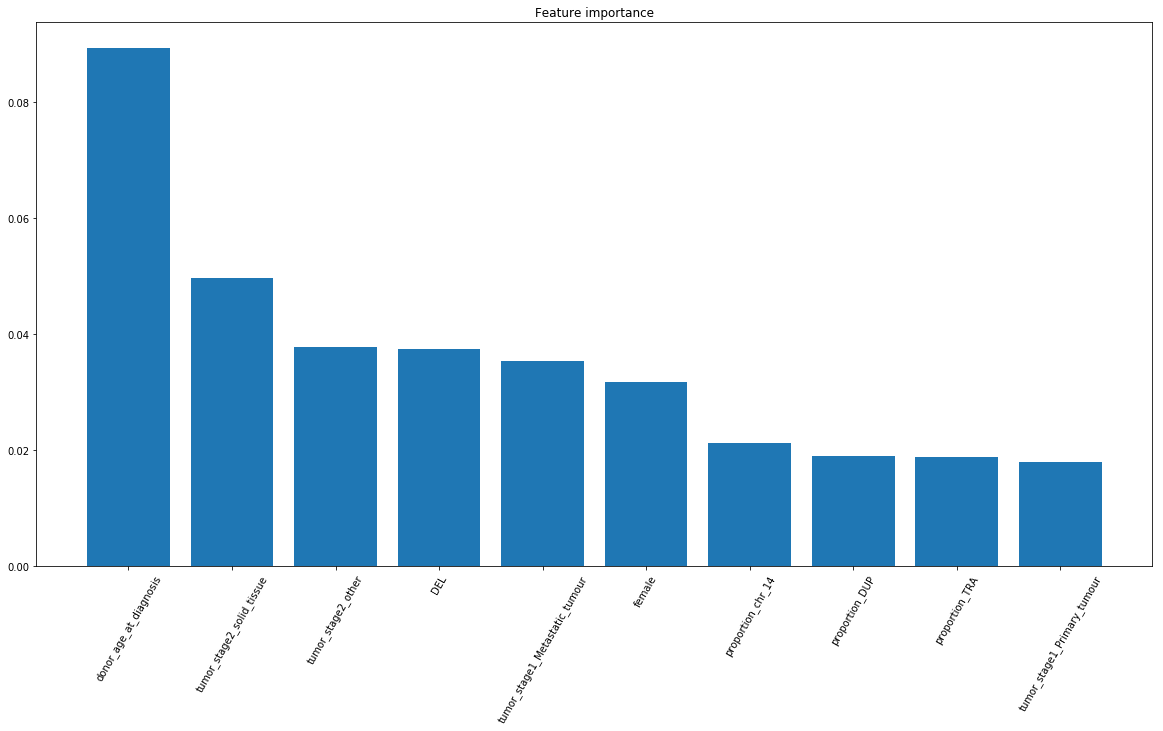

Random Forest 0.5907335907335908
[[ 0  0  1  3  0  0  0  0  0  0  1  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  4  0  0  0  2  0  2  0  0  0  0  0  0  1  0  0  2  0]
 [ 0  0  1 24  0  3  0  0  0  2  2  0  0  0  9  0  0  1  0  0  0]
 [ 0  0  2  2 38  0  0  0  0  5  0  1  0  0  0  0  0  3  0  1  0]
 [ 0  0  0  1  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  1  0  4  0  0  0  1  0  0  0  0  0  0  0  0  0  4]
 [ 0  0  1  2  0  0  1  9  0  0  2  0  0  0  1  0  1  0  0  0  0]
 [ 0  0  0  2  0  0  1  0  3  0  1  1  0  0  0  0  3  0  0  0  0]
 [ 0  0  2  3  2  0  0  0  0 20  4  1  0  0  0  1  0  0  0  2  0]
 [ 0  0  0  4  0  0  4  0  2  2 44  3  0  0  1  0  4  0  1  0  0]
 [ 0  0  0  1  0  0  0  2  0  0  8  3  0  0  1  0  2  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  1 36  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  1  0  0  0  0  0  0  0  0

<Figure size 432x288 with 0 Axes>

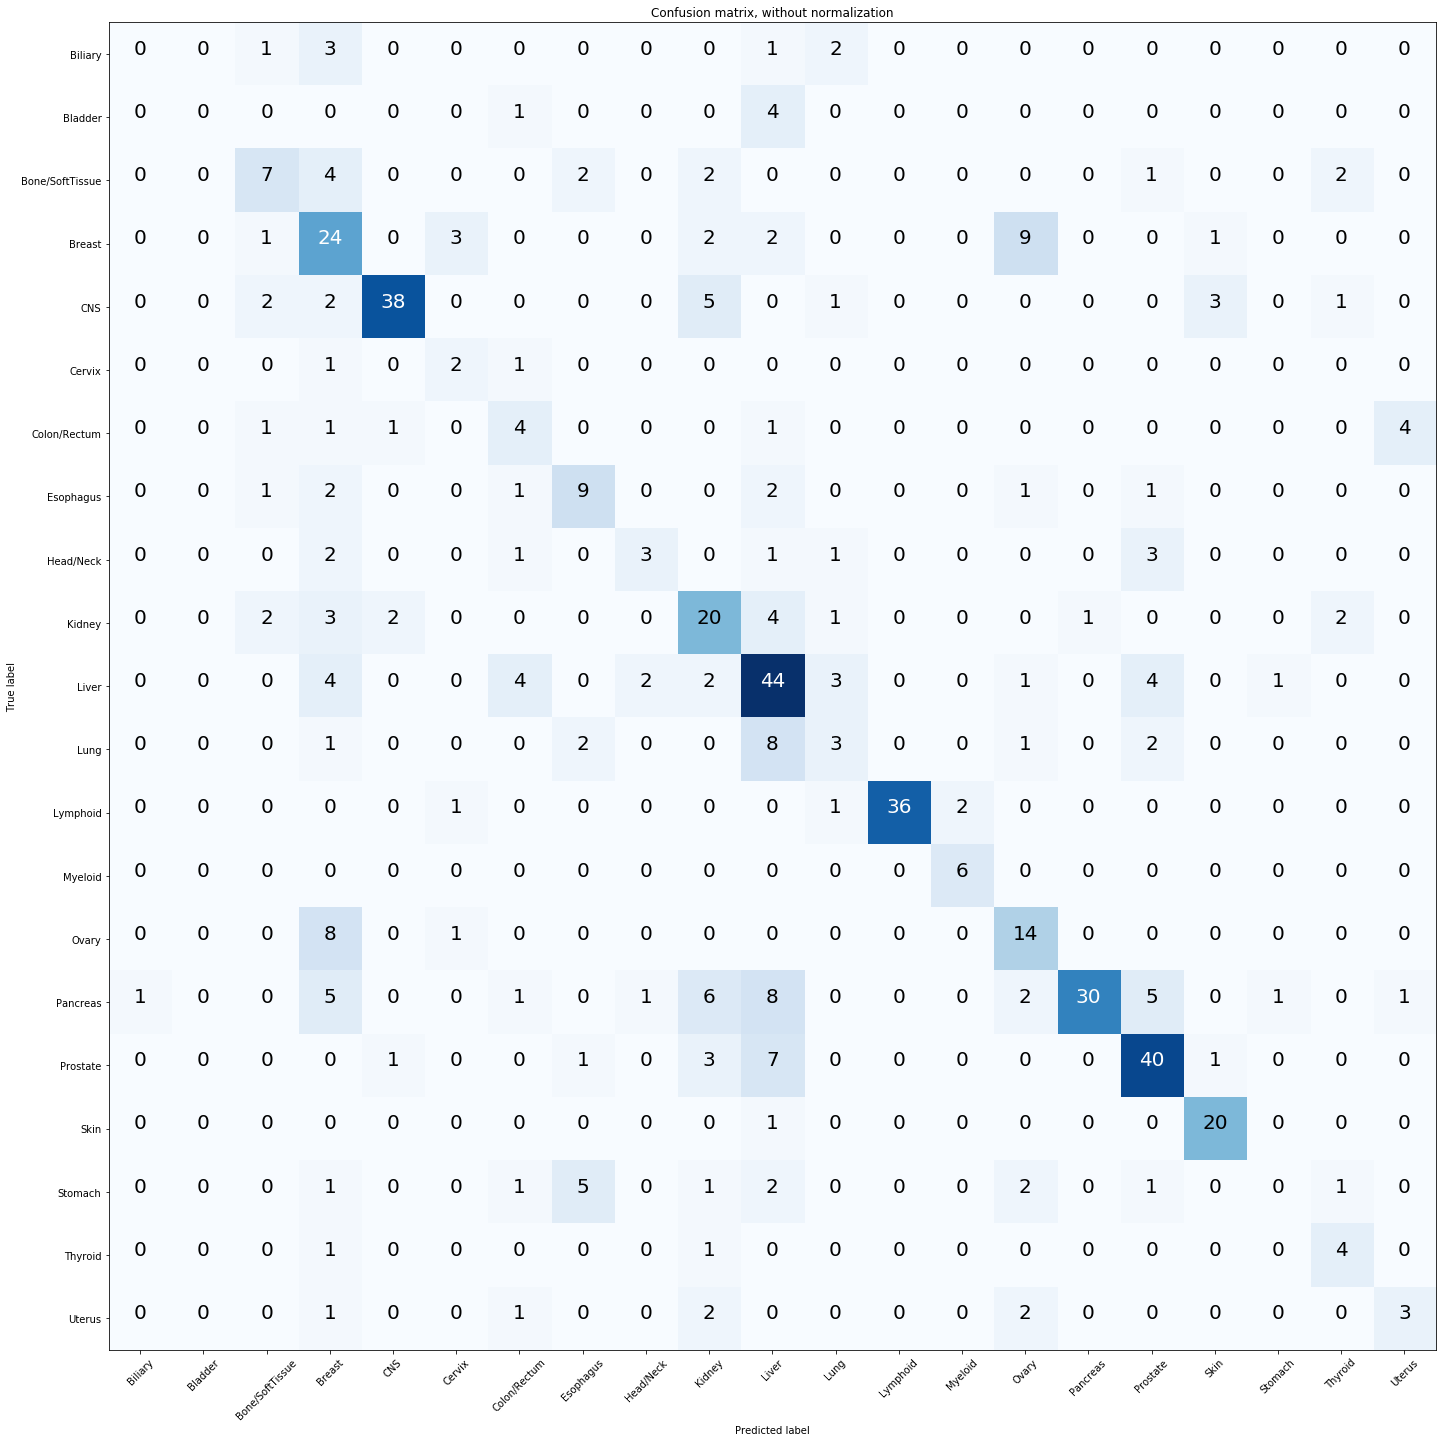

<Figure size 432x288 with 0 Axes>

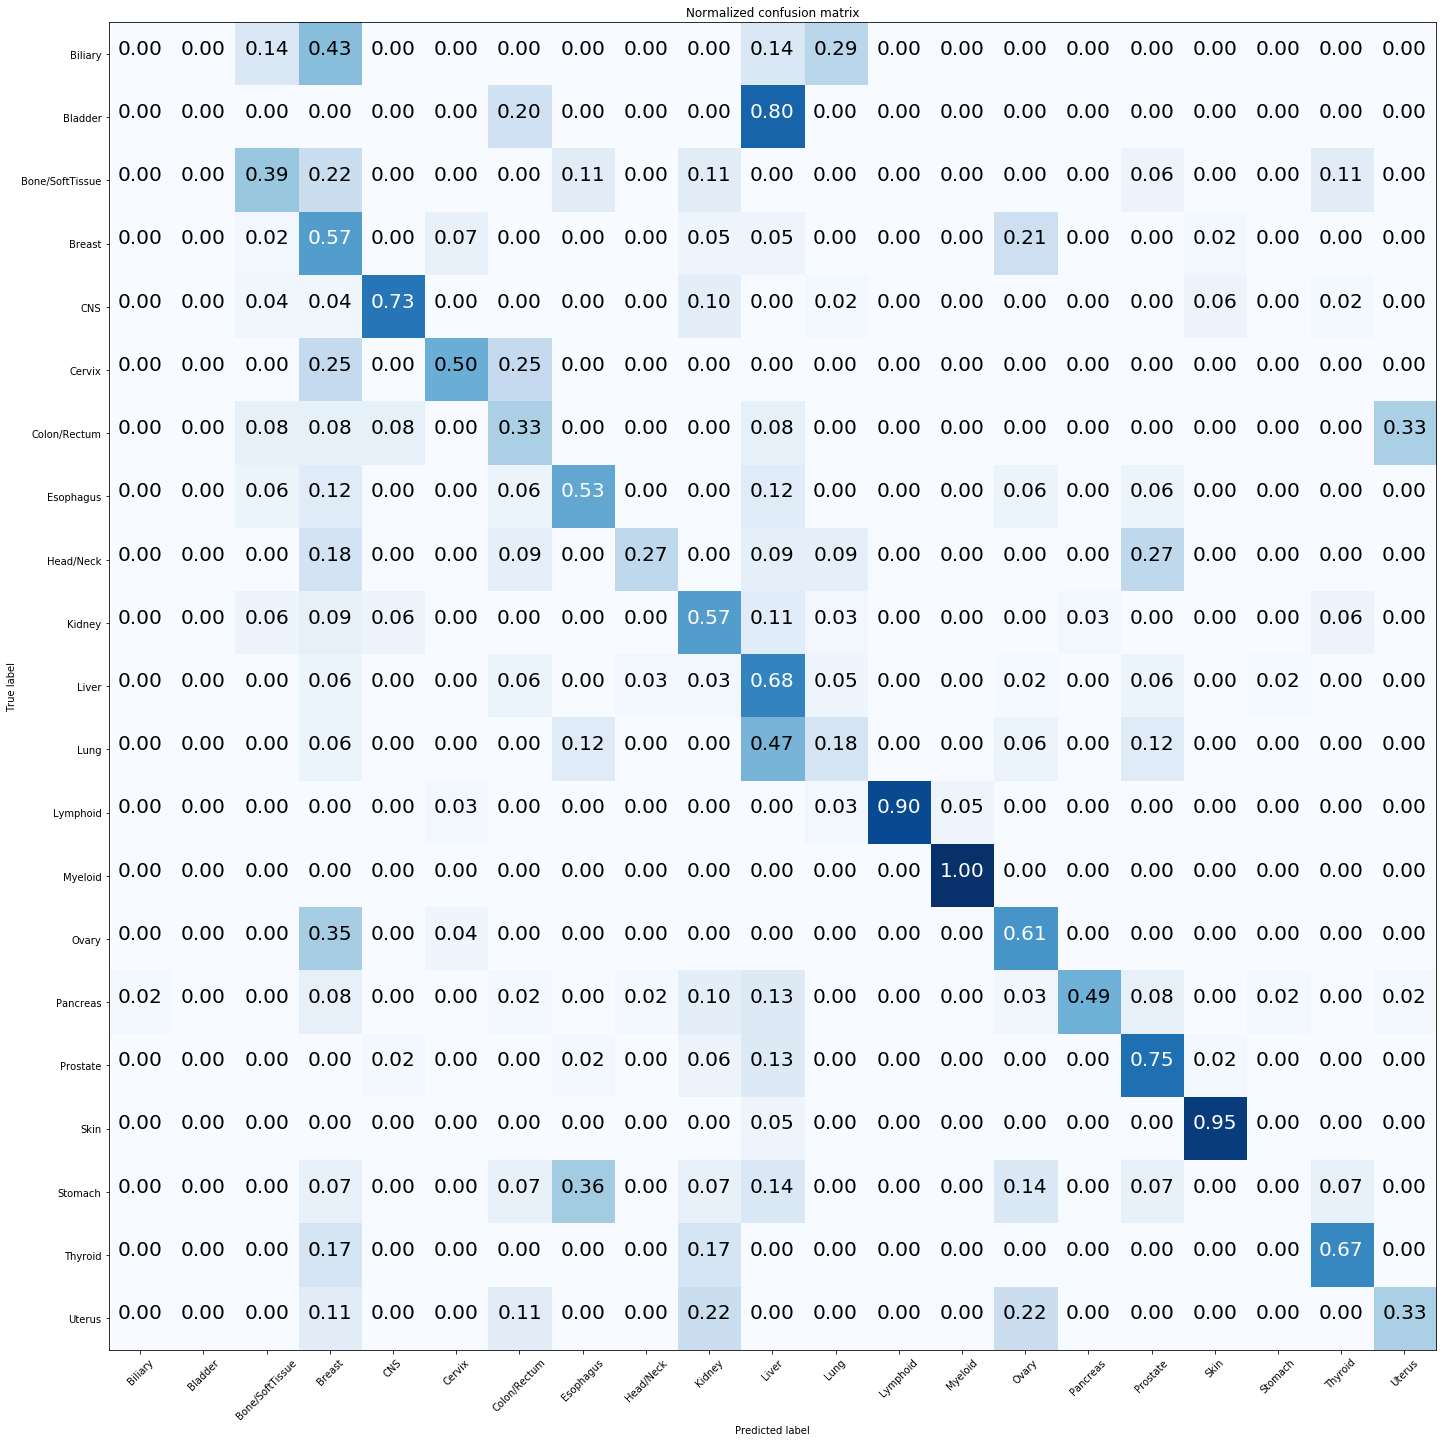

array(['donor_age_at_diagnosis', 'tumor_stage2_solid_tissue',
       'tumor_stage2_other', 'DEL', 'tumor_stage1_Metastatic_tumour',
       'female', 'proportion_chr_14', 'proportion_DUP', 'proportion_TRA',
       'tumor_stage1_Primary_tumour', 'TRA', 'number_of_breaks', 'chr_14',
       'proportion_chr_3', 'proportion_DEL', 'proportion_DEL_20',
       'proportion_chr_11', 'proportion_chr_1', 'proportion_chr_2', 'DUP',
       'proportion_DEL_16', 'proportion_h2hINV', 'proportion_chr_7',
       'proportion_t2tINV', 'proportion_chr_10', 'proportion_DEL_14',
       'proportion_chr_9', 'proportion_chr_19', 'chr_19', 'chr_3',
       'proportion_chr_6', 'proportion_chr_21', 'proportion_chr_8',
       'proportion_DEL_3', 'chr_16', 'proportion_DEL_2',
       'proportion_chr_4', 't2tINV', 'proportion_DEL_1',
       'proportion_chr_16', 'proportion_chr_20', 'proportion_DEL_4',
       'proportion_DEL_9', 'proportion_DEL_X', 'chr_10',
       'proportion_DEL_5', 'proportion_chr_5', 'proportion_chr_1

<Figure size 432x288 with 0 Axes>

In [150]:
feature_importance_hist2 = run_feature_extractor(datasets,100, hist1=False,labels=hist2)
Best_params ={'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 100, 'min_samples_split': 8, 'criterion': 'gini', 'max_features': 'auto', 'max_depth': 16, 'class_weight': 'balanced'}
features_hist2 = np.array(feature_importance_hist2.index)
features_hist2

In [19]:
# first run to find the best hyperparameters and extract the features
feature_importance = run_feature_extractor(datasets,50)

features = np.array(feature_importance.index)
features

Dataset ../../data_report/datasets/dataset_final_clean.csv
Running feature extractor..


Process PoolWorker-1:
Traceback (most recent call last):
  File "/usr/lib64/python2.7/multiprocessing/process.py", line 267, in _bootstrap
    self.run()


KeyboardInterrupt: 

# One vs All

In [18]:
def one_vs_all_random_forest(dataset_file,meta=True):
    print 'Dataset', dataset_file

    for class_name in labels:

        print 'One vs all ', class_name
        to_remove = [c for c in labels if c != class_name]

        df = pd.read_csv(dataset_file)
        df = df.replace(to_replace=to_remove, value='OTHER')
        print 'Preprocessing dataset:', dataset_file

        X_train, Y_train, X_test, Y_test = preprocessing(df)
        print(X_train.columns)
        feature_extraction_and_classification_rf(X_train, Y_train, X_test, Y_test, name='report', n_iter_search = 50,class_names=[class_name, 'OTHER'])

    if not meta:    
        for class_name in labels:

            print 'One vs all no meta', class_name
            to_remove = [c for c in labels if c != class_name]

            df = pd.read_csv(path)
            df = df.drop(['donor_age_at_diagnosis', 'donor_sex', 'tumor_stage1', 'tumor_stage2'], axis=1)
            df = df.replace(to_replace=to_remove, value='OTHER')
            X_train, Y_train, X_test, Y_test = preprocessing(df)
            feature_extraction_and_classification_rf(X_train, Y_train, X_test, Y_test, name='report', n_iter_search = 50)



In [ ]:
# sorted_by_value = sorted(fi_dict.items(), key=lambda kv: kv[1])
D = OrderedDict((k, v) for k, v in sorted(fi_dict.iteritems(), key=lambda kv: kv[1]))
plt.figure(figsize=(20, 10))

sns.barplot(range(10), list(D.values())[:10])
plt.xticks(range(10), list(D.keys())[:10], rotation=30)
plt.title('Best  10 features')

# Feature selection: 
We fix the hyperparameters and train a random forest k times. Then we sum the positions of the features and return them as a dictionary

In [ ]:
def voting_feature_selection(dataset_file,k,best_params,features,name='best'):
    # k= number of votations
    # Find the order of every feature
    try: 
        X_train = pd.read_csv(dataset_file.replace('.csv', '_clean.csv'),index_col=0)
        Y_train = X_train.pop('histology_tier1')
        print 'Dataset', dataset_file.replace('.csv', '_clean.csv')    
    except:
        print 'Dataset', dataset_file        
        df = pd.read_csv(dataset_file)
        print 'Preprocessing dataset:', dataset_file
        X_train, Y_train, X_test, Y_test = preprocessing(df)
    feature_importance = {feature:0 for feature in features}
    for i in range(k):
        if i%10==0:
            print i
        random_forest = RandomForestClassifier(**best_params)
        random_forest = random_forest.fit(X_train, Y_train)
        local_fi = np.array(pd.DataFrame(random_forest.feature_importances_,
                                       index=X_train.columns,
                                       columns=['importance']).sort_values('importance', ascending=False).index)
        j = 1
        for feature in local_fi:
            feature_importance[feature] += j
            j +=1
    D = OrderedDict((k, v) for k, v in sorted(feature_importance.iteritems(), key=lambda kv: kv[1]))
    size = 15
    sns.barplot(range(size), np.array(D.values())[:size]/300)
    plt.xticks(range(size), list(D.keys())[:size], rotation=30)
    plt.title('Best '+ str(size) +' features mean positions')
    plt.savefig(DATAPATH + '/plots/feature_importance/' + 'feature_importance_' + name + '.png',bbox_inches='tight')
    return D

In [ ]:
features = np.array(feature_importance.index)
k = 300
fi_dict = voting_feature_selection(datasets[0],k,best_params,features)
fi_dict

In [ ]:
D = OrderedDict((k, v) for k, v in sorted(fi_dict.iteritems(), key=lambda kv: kv[1]))
plt.figure(figsize=(20, 10))
size = 15
sns.barplot(range(size), np.array(D.values())[:size]/300)
plt.xticks(range(size), list(D.keys())[:size], rotation=30)
plt.title('Best  10 features mean positions')

np.array(D.values())[:10]/300, np.array(D.keys())[:10]

In [ ]:
def perform_feature_selection(path,best_params,fi_dict,labelnames=labels):
    D = OrderedDict((k, v) for k, v in sorted(fi_dict.iteritems(), key=lambda kv: kv[1]))
    num_features = [200,150,100,50,20,15,10,5]
    accuracies = []
    fscores = {}
    
    fscores = []
    for num in num_features:
        print 'Number of features', num
        to_drop = np.array(D.keys())[num:]
        X_train, Y_train, X_test, Y_test = load_data(path)
        X_train = X_train.drop(to_drop,axis=1)
        X_test = X_test.drop(to_drop,axis=1)
        print(X_train.columns, X_train.shape)
        random_forest = RandomForestClassifier(**best_params)
        random_forest = random_forest.fit(X_train, Y_train)
        score = random_forest.score(X_test, Y_test)
        accuracies.append(score)
        print 'Random Forest', score
        y_test_pred = random_forest.predict(X_test)
        
        
        fscore = metrics.f1_score(Y_test, y_test_pred,labels=labels,average='macro')
        print 'F score', fscore
        fscores.append(fscore)
        
        # Compute confusion matrix
        cnf_matrix = metrics.confusion_matrix(Y_test, y_test_pred,
                                              labels=labelnames)
        print(cnf_matrix)

        # Plot normalized confusion matrix
        plot_confusion_matrix(cnf_matrix, classes=labelnames, normalize=True,
                              title='Normalized confusion matrix', name=str(num))
    plt.figure(figsize=(20, 10))
    sns.barplot(range(len(num_features)), accuracies)
    plt.xticks(range(len(num_features)), num_features)
    plt.title('Number of features vs Accuracy')
    
    
    plt.figure(figsize=(20, 10))
    sns.barplot(range(len(num_features)), fscores)
    plt.xticks(range(len(num_features)), num_features)
    plt.title('Number of features vs F_score ')
    
    
    return num_features, accuracies
    
datasets = ['../../data_report/datasets/dataset_final.csv'] 
num_features, accuracies = perform_feature_selection(datasets[0],best_params,fi_dict)

# Feature selection with one vs all 

In [ ]:
def voting_feature_selection_one_vs_all(dataset_file,k,best_params,features,name='best_one_vs_all'):
    # k= number of votations
    # Find the order of every feature
    importance_per_class = {}
    for class_name in labels:

        print 'One vs all ', class_name
        to_remove = [c for c in labels if c != class_name]

        df = pd.read_csv(dataset_file)
        df = df.replace(to_replace=to_remove, value='OTHER')
        print 'Preprocessing dataset:', dataset_file

        X_train, Y_train, X_test, Y_test = preprocessing(df)
    
        feature_importance = {feature:0 for feature in features}
        for i in range(k):
            if i%10==0:
                print i
            random_forest = RandomForestClassifier(**best_params)
            random_forest = random_forest.fit(X_train, Y_train)
            local_fi = np.array(pd.DataFrame(random_forest.feature_importances_,
                                           index=X_train.columns,
                                           columns=['importance']).sort_values('importance', ascending=False).index)
            j = 1
            for feature in local_fi:
                feature_importance[feature] += j
                j +=1
        D = OrderedDict((k, v) for k, v in sorted(feature_importance.iteritems(), key=lambda kv: kv[1]))
        print D.items()[:15]
        plt.figure(figsize=(20, 10))
        size = 15
        sns.barplot(range(size), np.array(D.values())[:size]/k)
        plt.xticks(range(size), list(D.keys())[:size], rotation=40)
        plt.title('Best  15 features mean positions')
        plt.show()
        plt.savefig(DATAPATH + '/plots/feature_importance/' + 'feature_importance_' + class_name + '.png',bbox_inches='tight')
        importance_per_class[class_name] = D
    
    return importance_per_class

In [ ]:
init = time.time()
fi_dict_one_vs_all = voting_feature_selection_one_vs_all(datasets[0],50,best_params,features)
print'time:', timedelta(seconds=time.time() - init)

In [ ]:
for class_name in labels:
        print class_name
        D = fi_dict_one_vs_all[class_name]
        print(np.array(D.items())[:size])

In [ ]:
def perform_feature_selection_one_vs_all(path,best_params,all_fi_dict,class_names=labels):
    all_accuracies = {}
    all_fscores= {}
    for class_name in class_names:
        print class_name
        fi_dict = all_fi_dict[class_name]
        D = OrderedDict((k, v) for k, v in sorted(fi_dict.iteritems(), key=lambda kv: kv[1]))
        num_features = [200,150,100,50,20,15,10,5]
        accuracies = []
        fscores = []
        for num in num_features:
            print 'Number of features', num
            to_drop = np.array(D.keys())[num:]
            to_remove = [c for c in labels if c != class_name]
            df = pd.read_csv(path)
            df = df.replace(to_replace=to_remove, value='OTHER')
            print 'Preprocessing dataset:', path

            X_train, Y_train, X_test, Y_test = preprocessing(df)
            
            X_train = X_train.drop(to_drop,axis=1)
            X_test = X_test.drop(to_drop,axis=1)
            
            print(X_train.columns, X_train.shape)
            random_forest = RandomForestClassifier(**best_params)
            random_forest = random_forest.fit(X_train, Y_train)
            score = random_forest.score(X_test, Y_test)
            
            accuracies.append(score)
            print 'Random Forest', score
            y_test_pred = random_forest.predict(X_test)
            fscore = metrics.f1_score(Y_test, y_test_pred,pos_label= class_name,labels=[class_name, 'OTHER'])
            print 'F score', fscore

            fscores.append(fscore)
            # Compute confusion matrix
            cnf_matrix = metrics.confusion_matrix(Y_test, y_test_pred,
                                                  labels=[class_name, 'OTHER'])
            print(cnf_matrix)

            # Plot normalized confusion matrix
            plot_confusion_matrix(cnf_matrix, classes=[class_name, 'OTHER'], normalize=True,
                                  title='Normalized confusion matrix', name=str(num))
        all_accuracies[class_name] = accuracies
        plt.figure(figsize=(20, 10))
        sns.barplot(range(len(num_features)), accuracies)
        plt.xticks(range(len(num_features)), num_features)
        plt.title('Number of features vs Accuracy of ' + class_name)
        
        plt.figure(figsize=(20, 10))
        sns.barplot(range(len(num_features)), fscores)
        plt.xticks(range(len(num_features)), num_features)
        plt.title('Number of features vs F-score of ' + class_name)
    return num_features, all_accuracies
    
datasets = ['../../data_report/datasets/dataset_final.csv'] 
num_features, all_accuracies = perform_feature_selection_one_vs_all(datasets[0],best_params,fi_dict_one_vs_all)

In [ ]:
def main():
    # datasets = os.listdir(DATAPATH + '/datasets/')
    datasets = ['../../data_report/datasets/dataset_final.csv']
    print('Runing feature extractor')
    #run_feature_extractor(datasets)
    one_vs_all_random_forest(datasets[0])


if __name__ == '__main__':
    init = time.time()
    main()
    print'time:', timedelta(seconds=time.time() - init)

# TODO:
* **Characterización de la feature chromosómica más importante + por clase}**
* Clasificador solo con las features chromosomicas (de las 15 mejores) con una SVM. 
* Cambio las accuracies por fscore
* Añadir la suma total a la tabla de las histologias.

# Characterize the best chromosomic features

|    All     |   ECTODERM  |   ENDODERM  |   MESODERM  | NEURAL CREST |
|:----------:|:-----------:|:-----------:|:-----------:|:------------:|
|    chr_8   |    chr_8    | prop_chr_21 | prop_DEL_14 |     chr_5    |
| prop_chr_8 |   (11,17)   |  prop_chr_4 |  prop_chr_3 |    chr_10    |
| prop_chr_5 |  prop_DEL_4 |  prop_chr_6 |    chr_19   |    chr_21    |
|      -     |  prop_chr_9 |      -      |  prop_chr_9 |     DUP_7    |
|      -     |  prop_chr_5 |      -      |      -      |  prop_chr_9  |
|      -     |  prop_chr_1 |      -      |      -      |  prop_chr_21 |
|      -     | prop_chr_18 |      -      |      -      |    DEL_10    |
|      -     | prop_chr_19 |      -      |      -      |  prop_chr_8  |
|      -     |  prop_chr_8 |      -      |      -      |    chr_18    |
|      -     |      -      |      -      |      -      |  prop_chr_2  |
|      -     |      -      |      -      |      -      |     chr_7    |

In [130]:
features = ['chr_8', 'chr_21','DEL_14','chr_3', 'chr_4','chr_5',
            'chr_10','DEL_4','chr_6','chr_19', 'chr_9', 'DUP_7', 'chr_1', 'chr_2','chr_7', 'chr_18',
            'chr_11','chr_12', 'number_of_breaks'
           ]
features_with_prop = ['chr_8', 'proportion_chr_8', 'chr_21', 'proportion_chr_21', 'DEL_14' ,'proportion_DEL_14','chr_5',
                      'proportion_chr_5','(11,17)','proportion_chr_4',
            'proportion_chr_3','chr_10','proportion_DEL_4','proportion_chr_6','chr_19', 'proportion_chr_19',
           'proportion_chr_9', 'DUP_7', 'proportion_chr_1', 'proportion_chr_2','chr_7', 'chr_18'
           ]


In [82]:
# First i try with the code I already have
df_ = pd.read_csv(datasets[0])
#print(df_.loc[:,'histology_tier2'])
df_ = preprocessing_without_split(df_,)
print(df_.loc[:,'histology_tier2'])


0             Breast
1             Breast
2             Breast
3             Breast
4             Breast
5             Breast
6             Breast
7             Breast
8             Breast
9             Breast
10            Breast
11            Breast
12            Breast
13            Breast
14            Breast
15            Breast
16            Breast
17            Breast
18      Colon/Rectum
19            Breast
20            Breast
21      Colon/Rectum
22      Colon/Rectum
23      Colon/Rectum
24          Prostate
25          Prostate
26          Prostate
27          Prostate
28          Prostate
29          Prostate
            ...     
2556    Colon/Rectum
2557    Colon/Rectum
2558    Colon/Rectum
2559    Colon/Rectum
2560    Colon/Rectum
2561    Colon/Rectum
2562    Colon/Rectum
2563         Bladder
2564    Colon/Rectum
2565         Bladder
2566    Colon/Rectum
2567         Bladder
2568    Colon/Rectum
2569    Colon/Rectum
2570         Bladder
2571    Colon/Rectum
2572    Colon

In [83]:
df_.loc[df['histology_tier1'] == "ECTODERM"].head()

,"(1,10)","(1,11)","(1,12)","(1,13)","(1,14)","(1,15)","(1,16)","(1,17)","(1,18)","(1,19)",...,proportion_proportion_DEL_X,proportion_proportion_DUP_X,proportion_proportion_chr_Y,proportion_proportion_DEL_Y,proportion_proportion_DUP_Y,proportion_proportion_DUP,proportion_proportion_DEL,proportion_proportion_TRA,proportion_proportion_h2hINV,proportion_proportion_t2tINV
0,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.0,0.004591,0.009183,0.005510,0.007346,0.003673
1,1,2,2,0,0,2,0,2,0,0,...,0.000026,0.000039,0.0,0.0,0.0,0.002163,0.000613,0.000613,0.000117,0.000104
2,0,0,0,0,0,0,0,0,0,0,...,0.000032,0.000032,0.0,0.0,0.0,0.000629,0.001871,0.000581,0.000484,0.000452
3,0,0,0,0,0,0,0,0,0,1,...,0.000098,0.000065,0.0,0.0,0.0,0.002024,0.001469,0.001110,0.000588,0.000522
4,0,0,1,0,1,0,2,0,0,0,...,0.000094,0.000094,0.0,0.0,0.0,0.000655,0.002840,0.001311,0.000406,0.000375


In [116]:
np.unique(df_['histology_tier2'])

array(['Biliary', 'Bladder', 'Bone/SoftTissue', 'Breast', 'CNS', 'Cervix',
       'Colon/Rectum', 'Esophagus', 'Head/Neck', 'Kidney', 'Liver',
       'Lung', 'Lymphoid', 'Myeloid', 'Ovary', 'Pancreas', 'Prostate',
       'Skin', 'Stomach', 'Thyroid', 'Uterus'], dtype=object)

chr_8
chr_21
DEL_14
chr_3
chr_4
chr_5
chr_10
DEL_4
chr_6
chr_19
chr_9
DUP_7
chr_1
chr_2
chr_7
chr_18
chr_11
chr_12
number_of_breaks


<Figure size 1440x720 with 0 Axes>

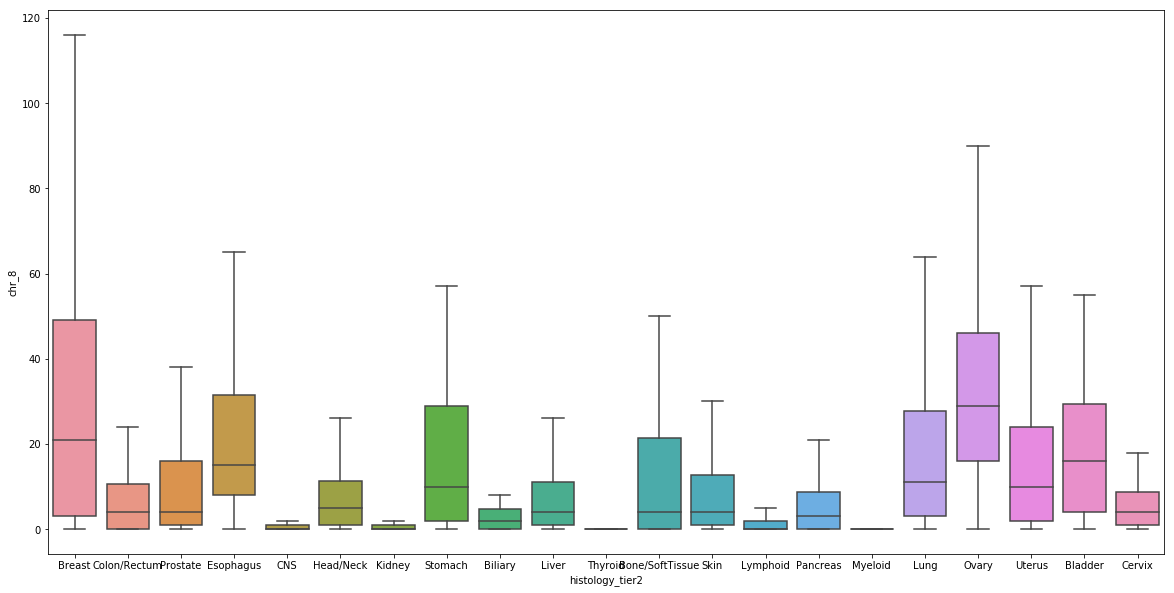

<Figure size 1440x720 with 0 Axes>

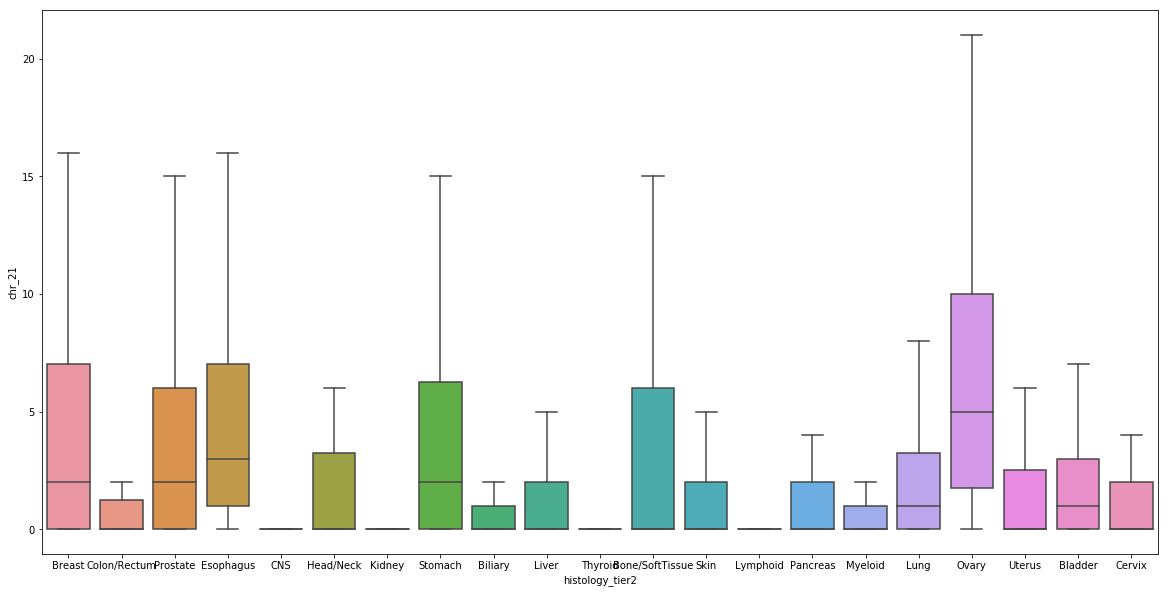

<Figure size 1440x720 with 0 Axes>

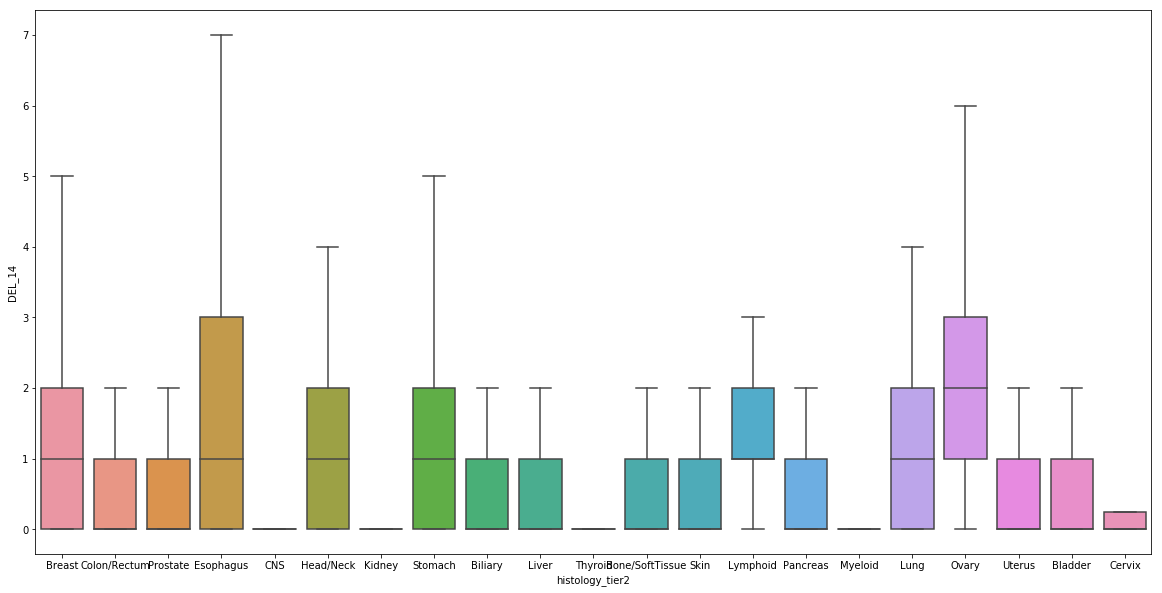

<Figure size 1440x720 with 0 Axes>

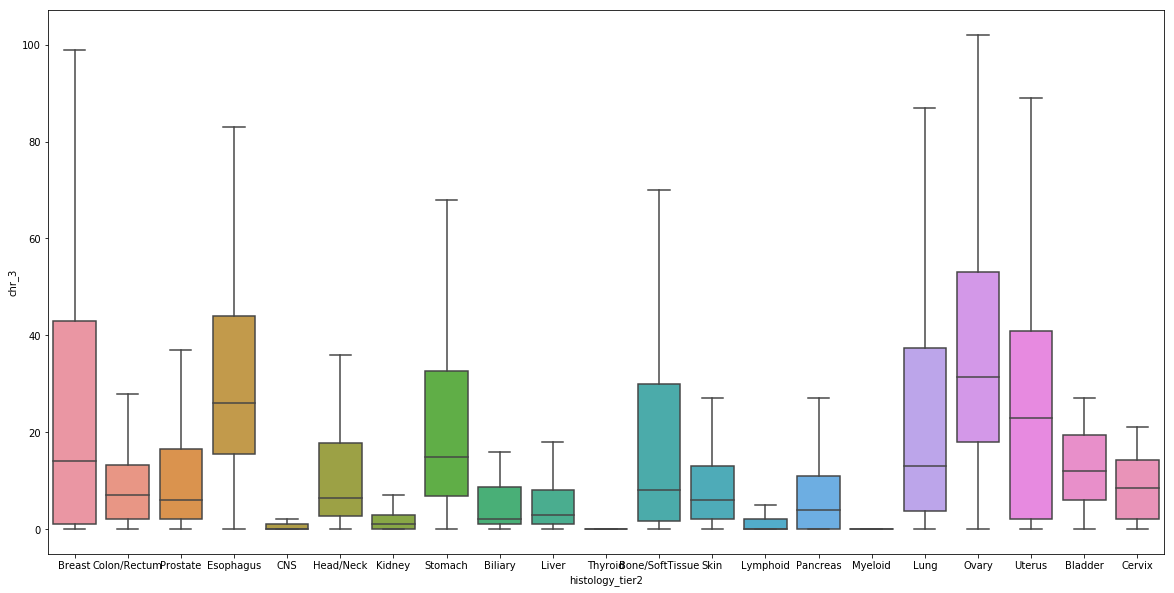

<Figure size 1440x720 with 0 Axes>

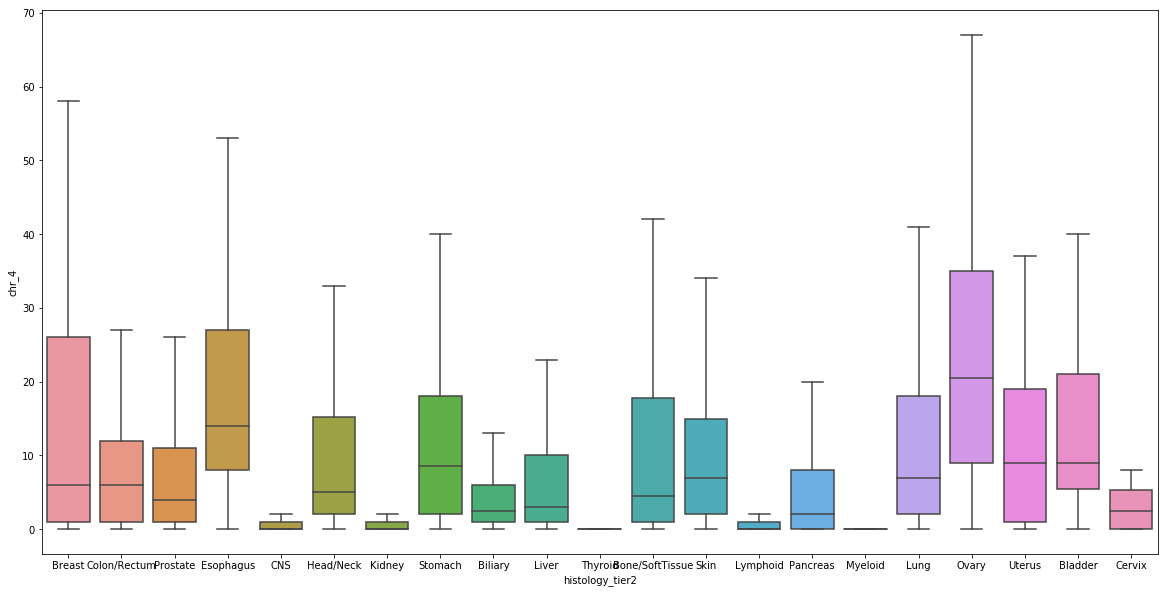

<Figure size 1440x720 with 0 Axes>

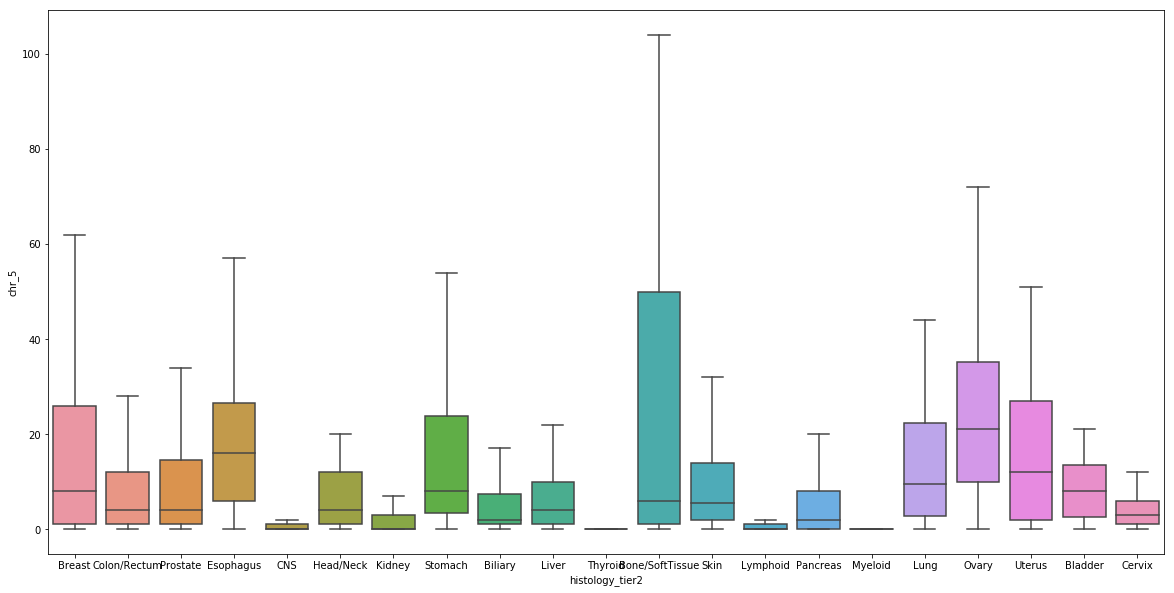

<Figure size 1440x720 with 0 Axes>

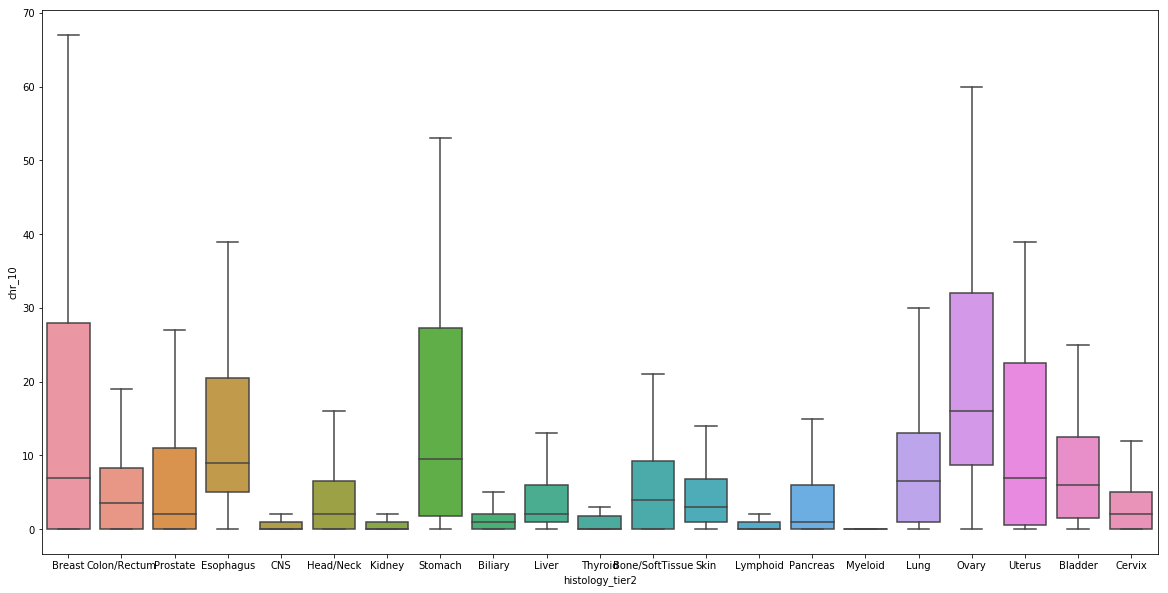

<Figure size 1440x720 with 0 Axes>

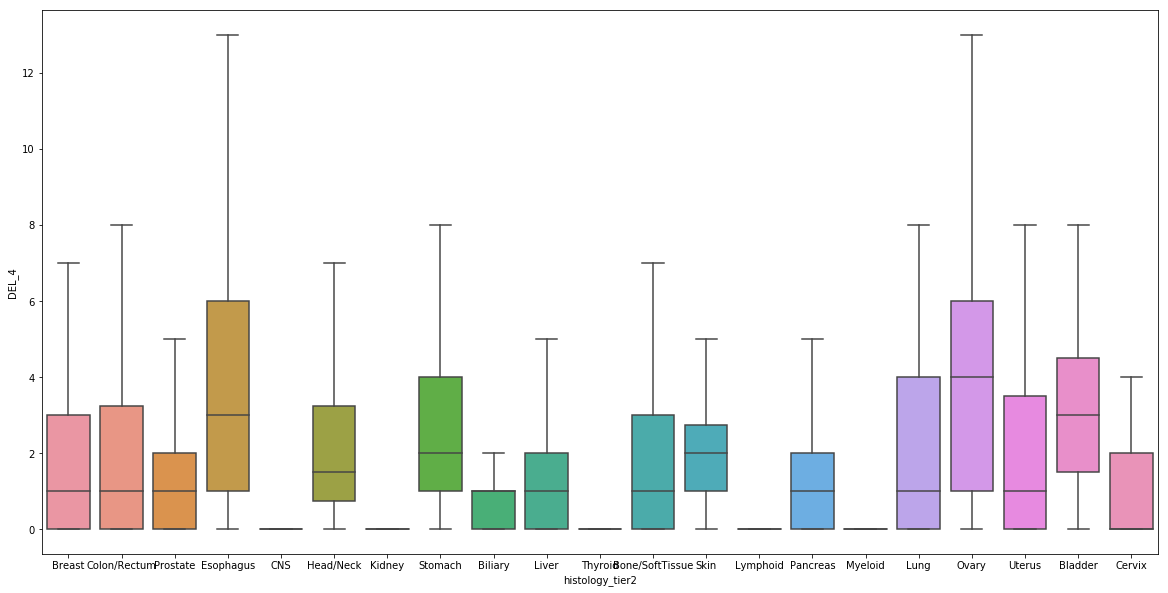

<Figure size 1440x720 with 0 Axes>

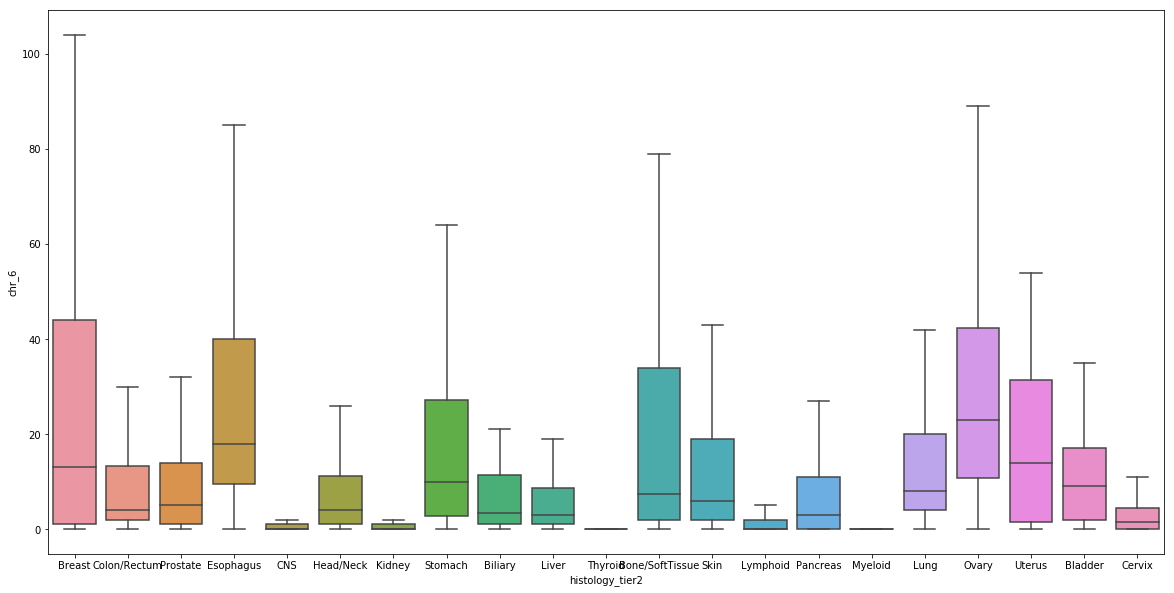

<Figure size 1440x720 with 0 Axes>

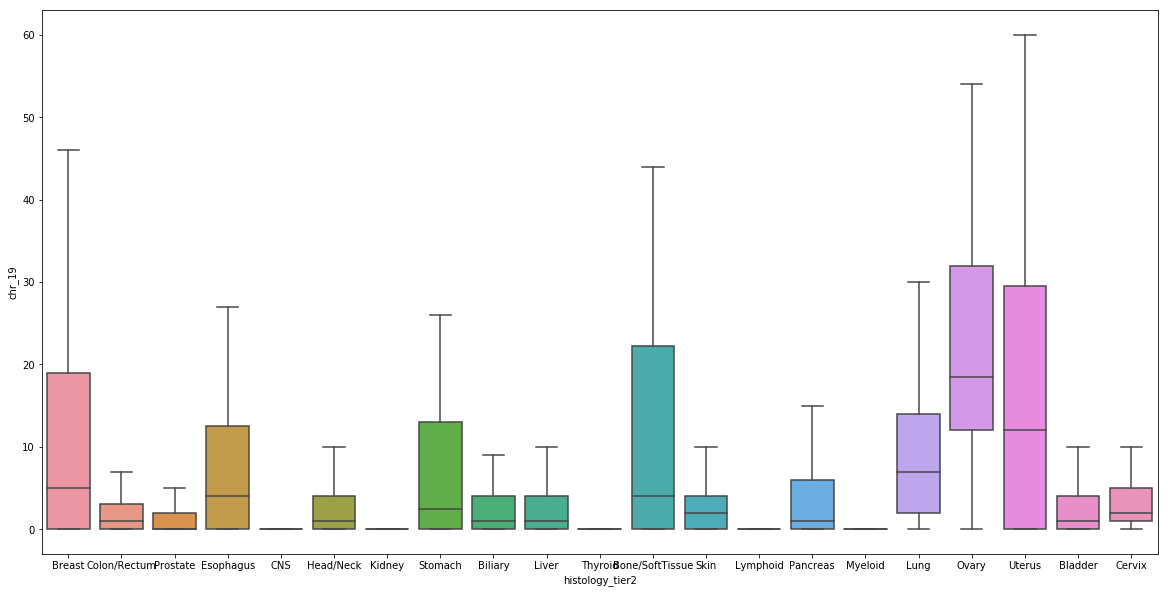

<Figure size 1440x720 with 0 Axes>

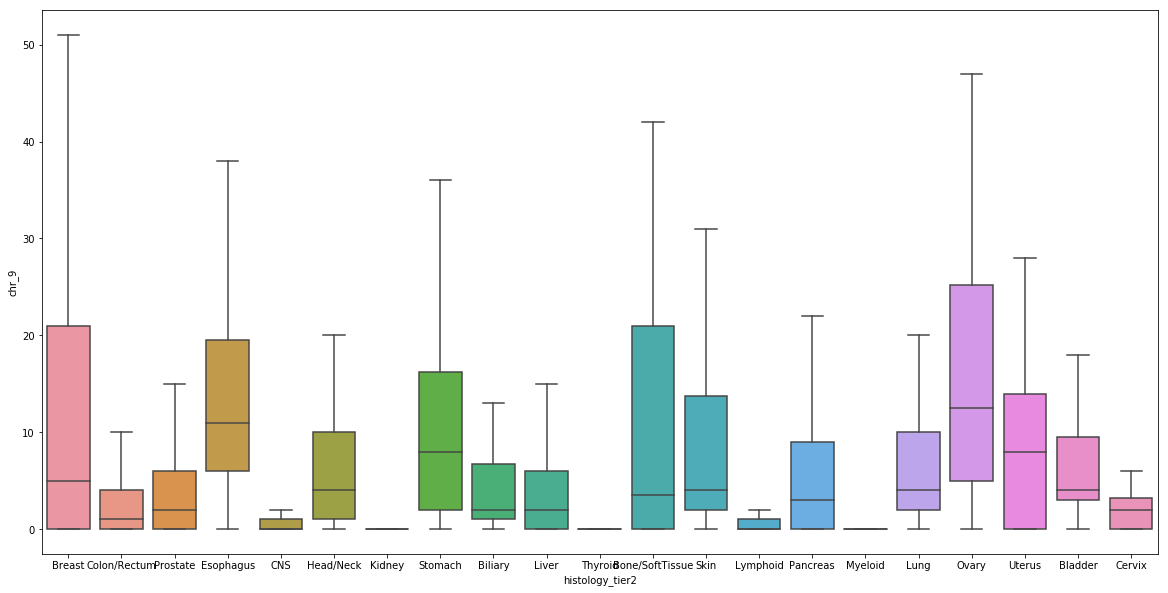

<Figure size 1440x720 with 0 Axes>

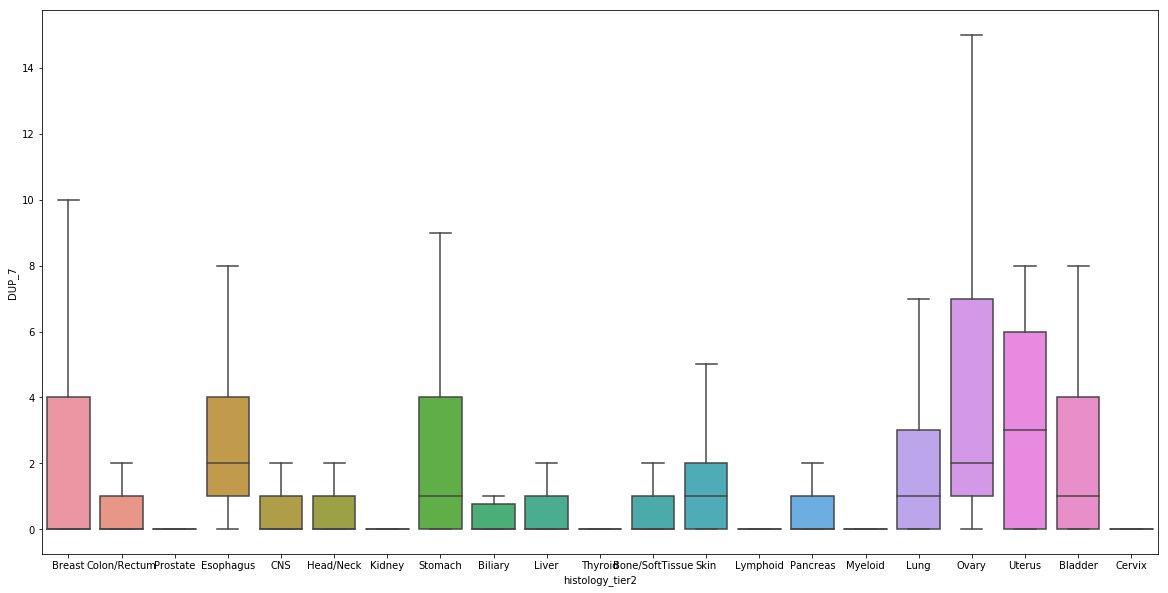

<Figure size 1440x720 with 0 Axes>

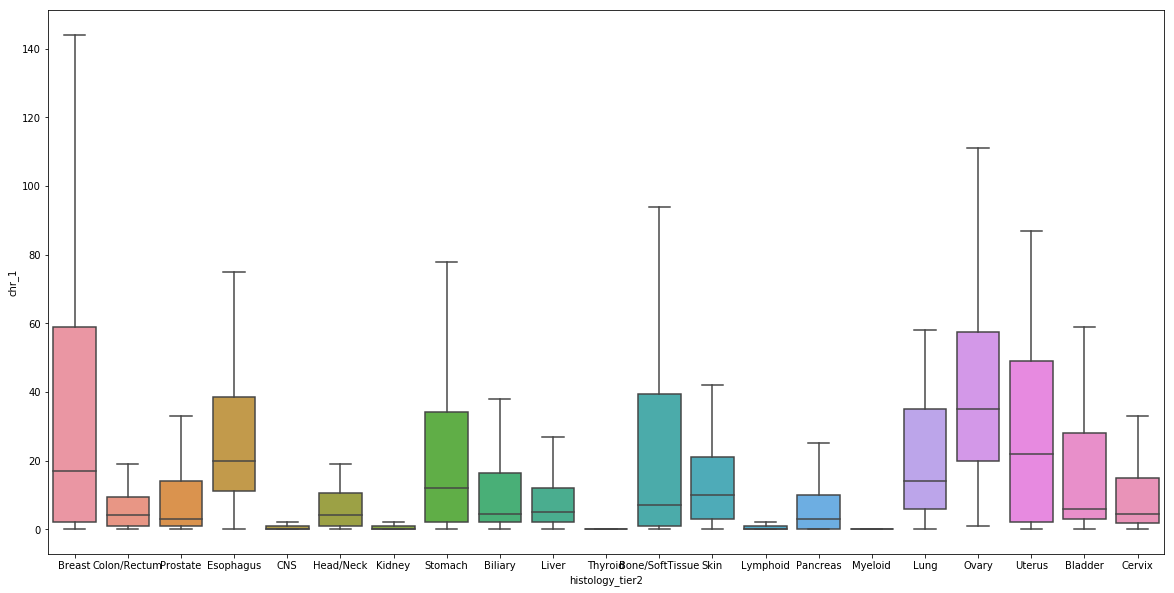

<Figure size 1440x720 with 0 Axes>

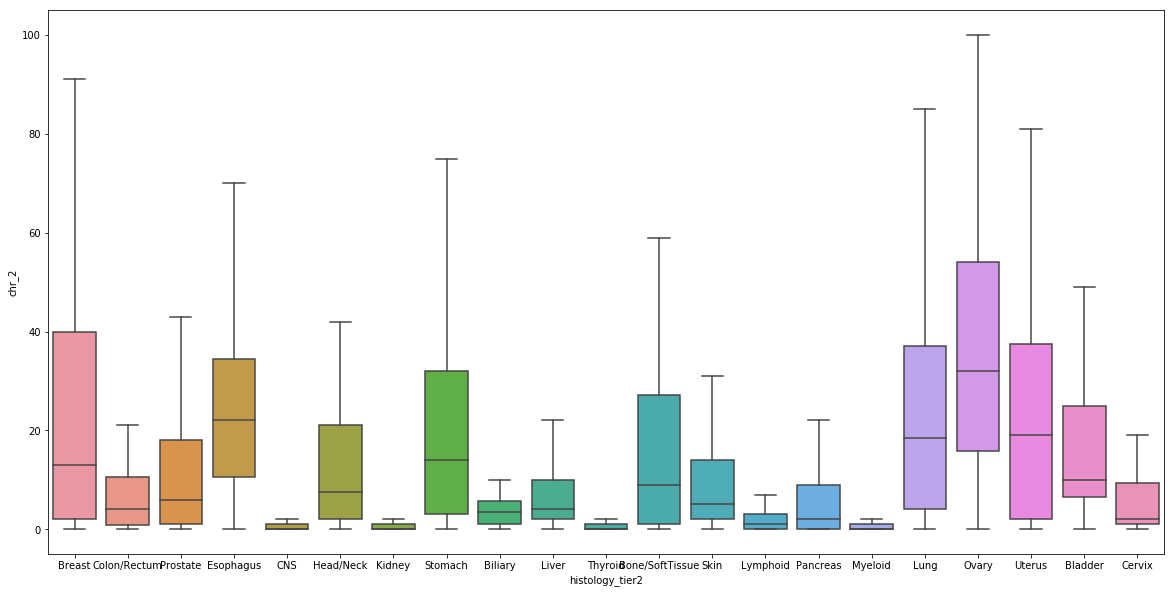

<Figure size 1440x720 with 0 Axes>

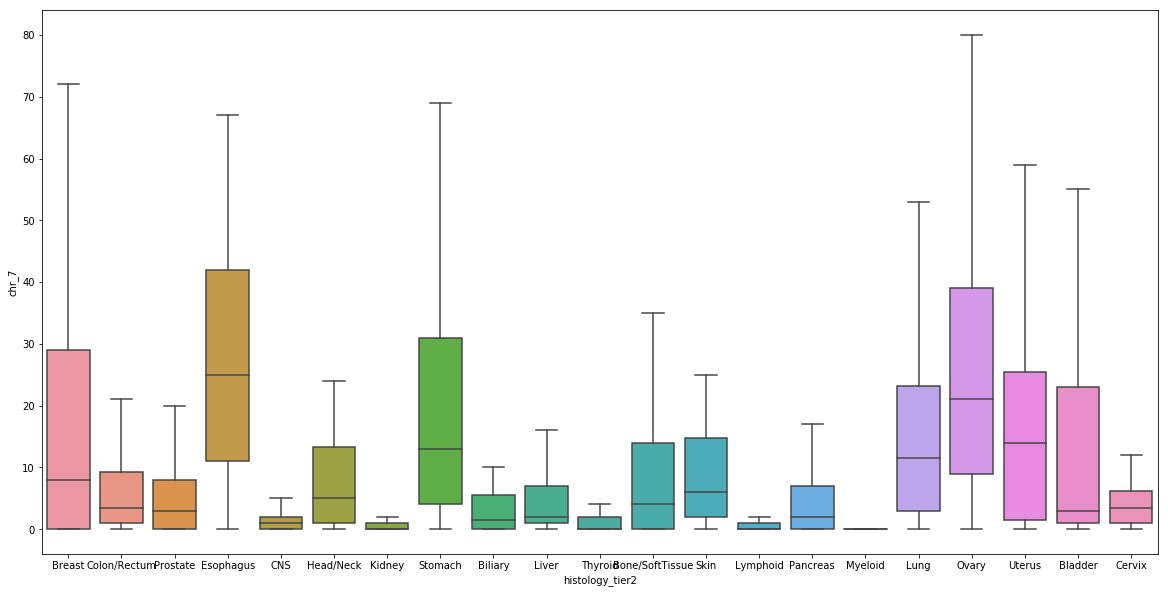

<Figure size 1440x720 with 0 Axes>

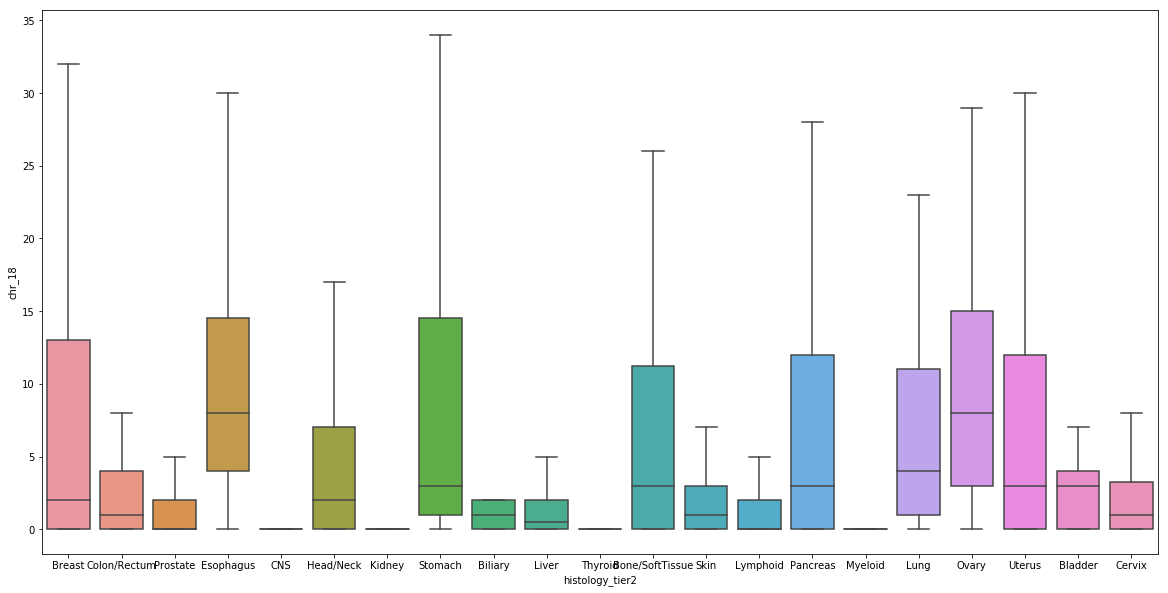

<Figure size 1440x720 with 0 Axes>

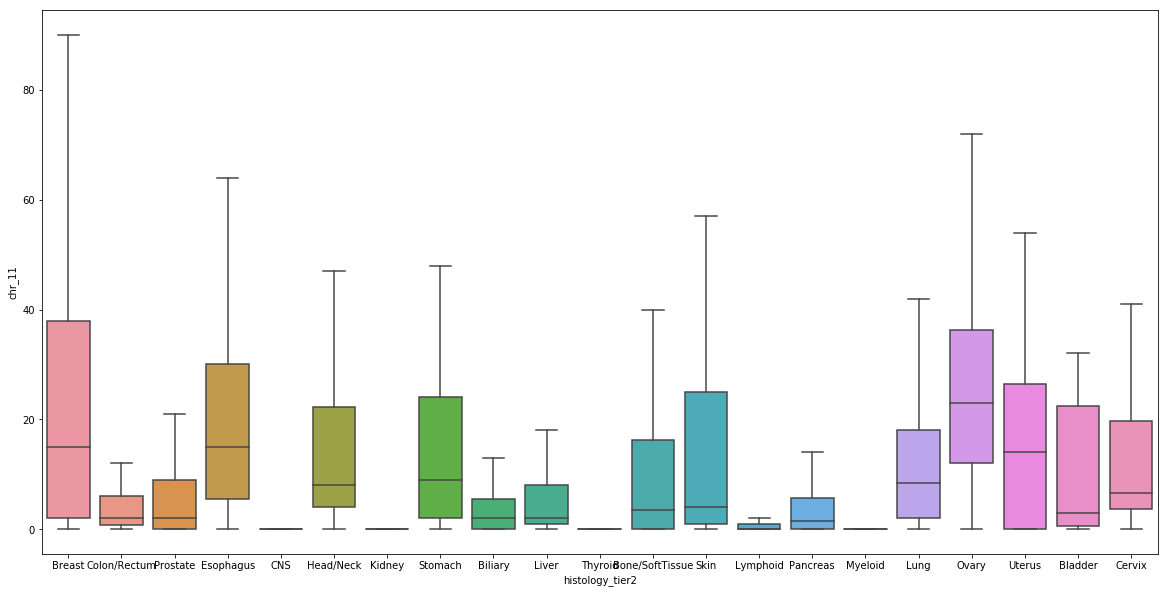

<Figure size 1440x720 with 0 Axes>

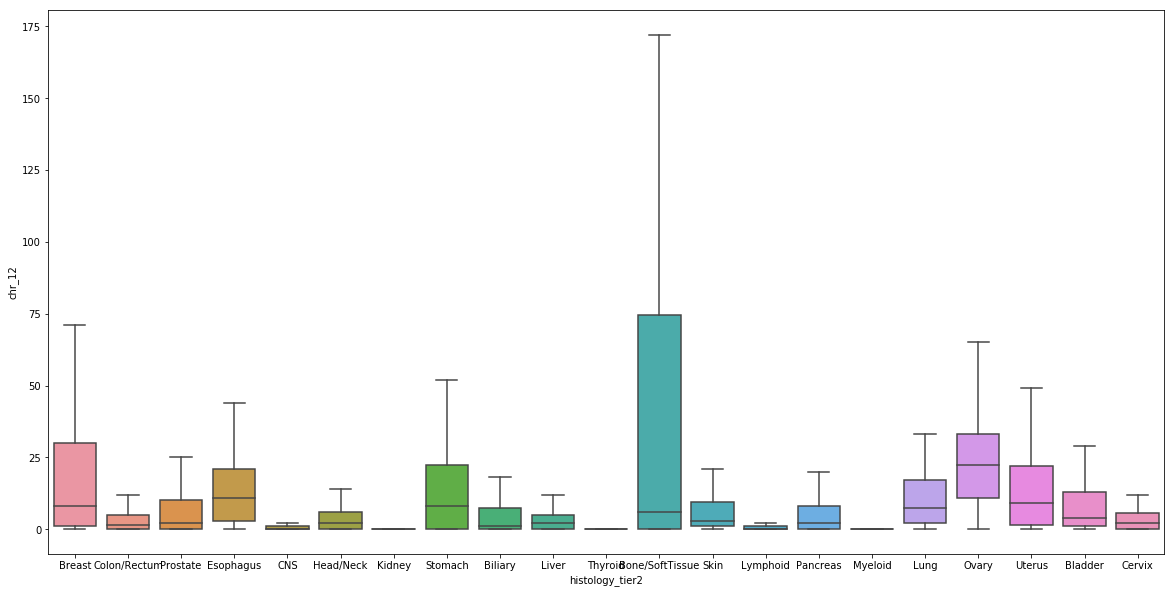

<Figure size 1440x720 with 0 Axes>

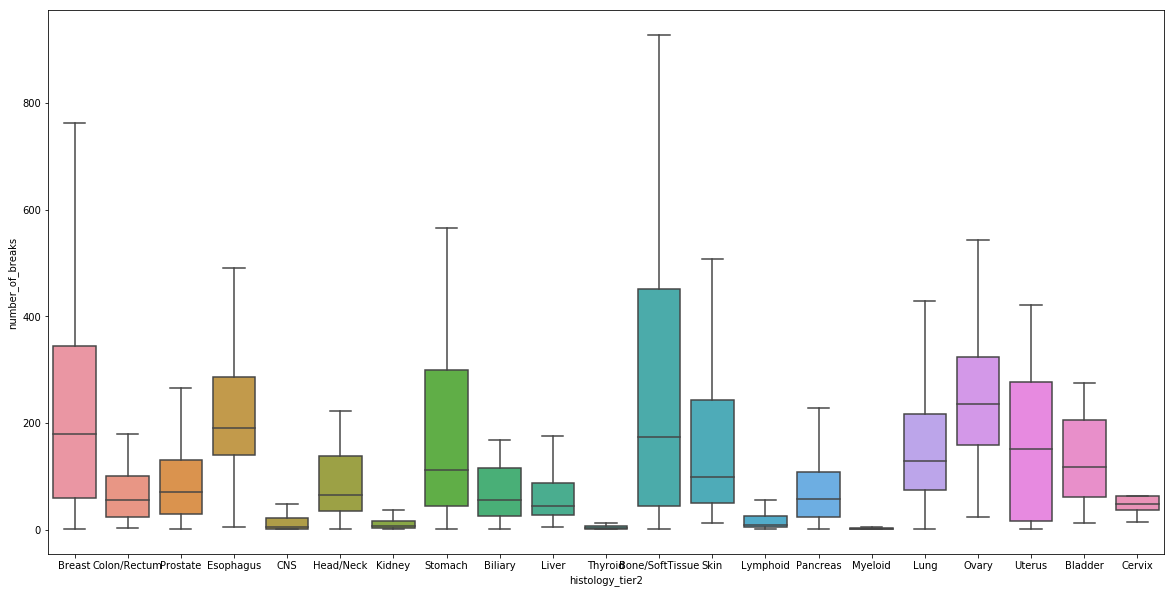

In [161]:
def feature_characterization_hist2(col,df):
    print col
    no_outliers = lambda df, col : df[np.abs(df[col]-df[col].mean()) <= (2*df[col].std())]
    colors = ['b','y','g','r']
    
    plt.figure(figsize=(20, 10))
    #for i,hist in enumerate(np.unique(df['histology_tier2'])):
    #    litl = df.loc[df['histology_tier2'] == hist]
    #    no_out = no_outliers(litl,col)
    #    try: 
    #        sns.distplot(no_out[col],hist=False,label=hist)
    #        plt.legend()
    #        plt.title('Comparative per class of the feature ' + col)       
    #    except Exception as e:
    #        print e , hist
    plt.figure(figsize=(20, 10))
    sns.boxplot(x="histology_tier2", y=col, data=df,showfliers=False);
    plt.savefig(DATAPATH + '/plots/box/hist2_' +col + '.png', bbox_inches='tight')
    
for feature in features:
    feature_characterization_hist2(feature,df_)

In [159]:
def feature_characterization(col):
    print col
    no_outliers = lambda df, col : df[np.abs(df[col]-df[col].mean()) <= (2*df[col].std())]
    colors = ['b','y','g','r']
    plt.figure(figsize=(20, 10))
    for hist in labels:
        litl = df.loc[df['histology_tier1'] == hist]
        no_out = no_outliers(litl,col)
        sns.distplot(no_out[col],hist=False,label=hist)
        plt.legend()
        plt.title('Comparative per class of the feature ' + col)       
    plt.savefig(DATAPATH + '/plots/box/' +'lines_hist1_' + col + '.png', bbox_inches='tight')

    plt.figure(figsize=(20, 10))
    sns.boxplot(x="histology_tier1", y=col, data=df,showfliers=False);
    plt.savefig(DATAPATH + '/plots/box/hist1_' + col + '.png', bbox_inches='tight')

chr_8
chr_21
DEL_14
chr_3
chr_4
chr_5
chr_10
DEL_4
chr_6
chr_19
chr_9
DUP_7
chr_1
chr_2
chr_7
chr_18
chr_11
chr_12
number_of_breaks


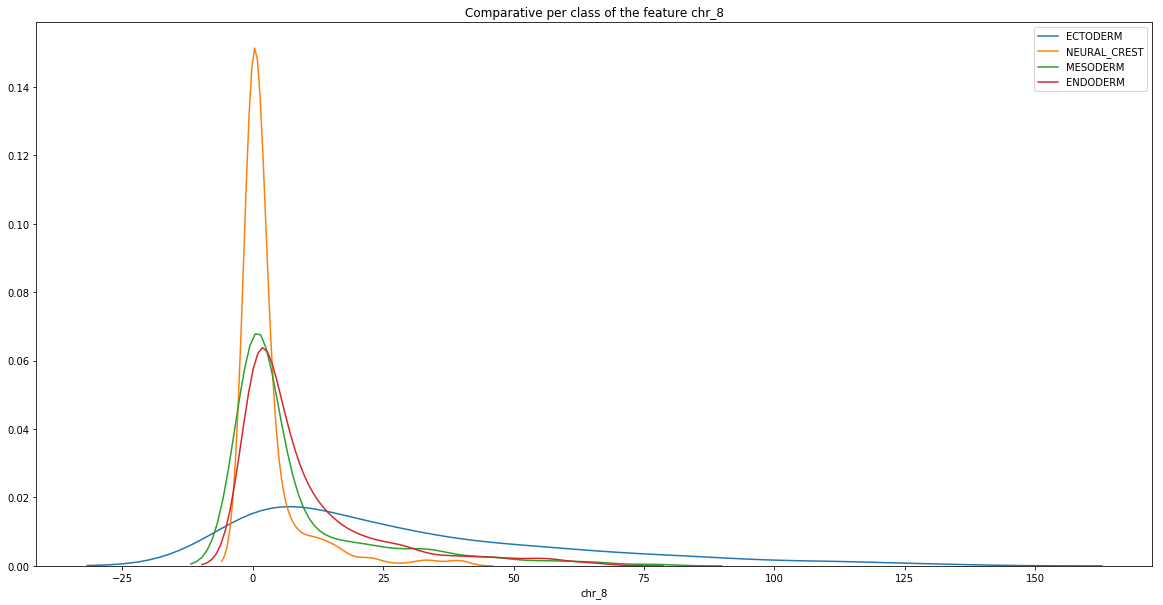

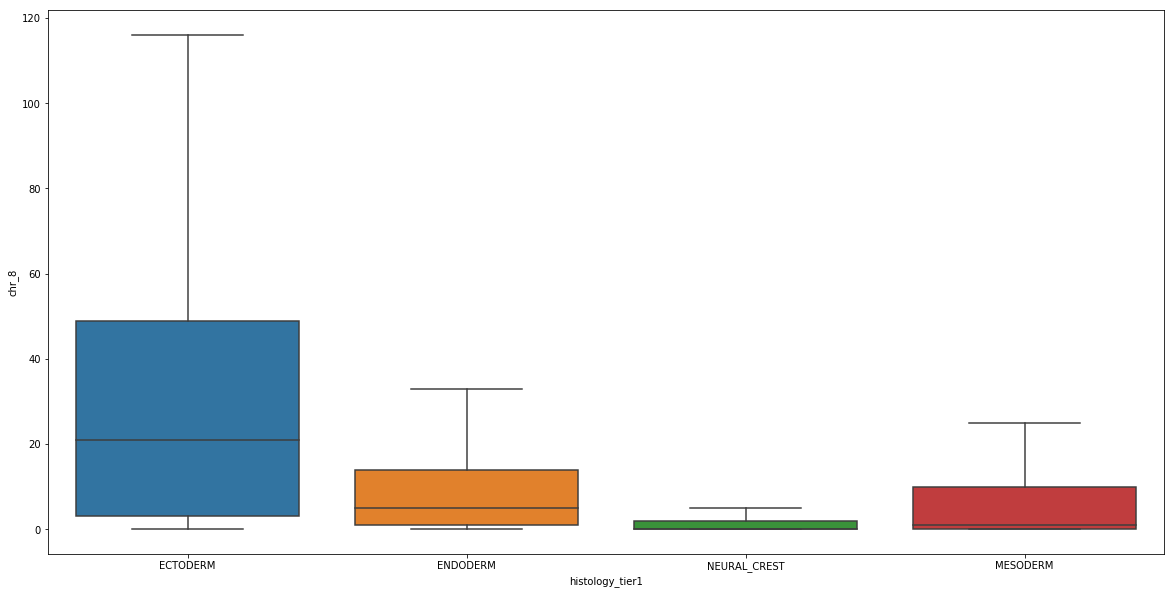

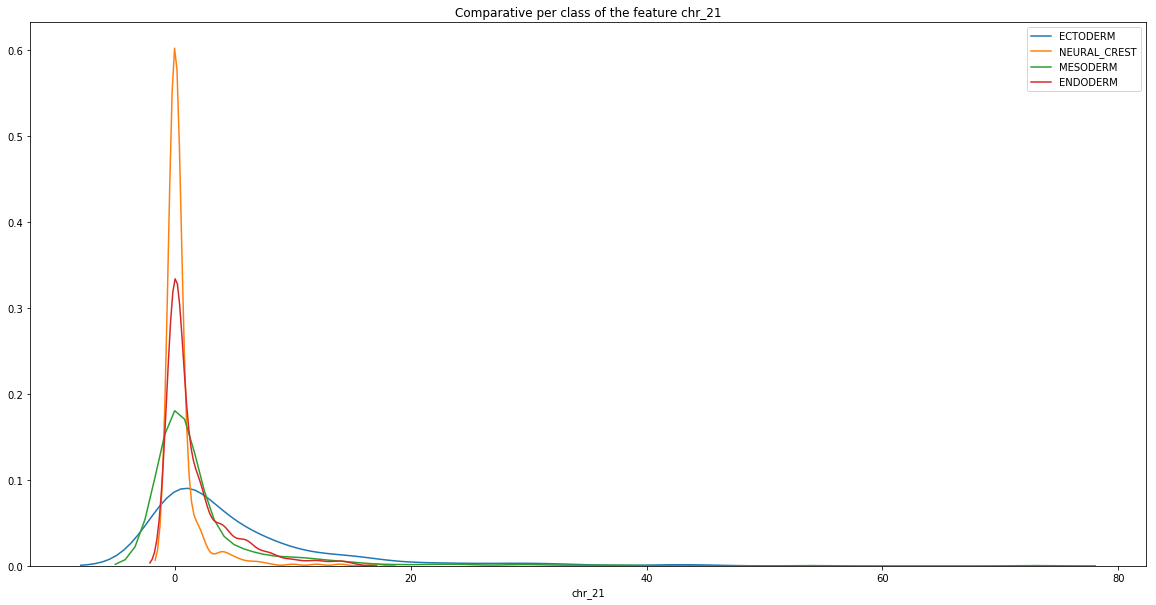

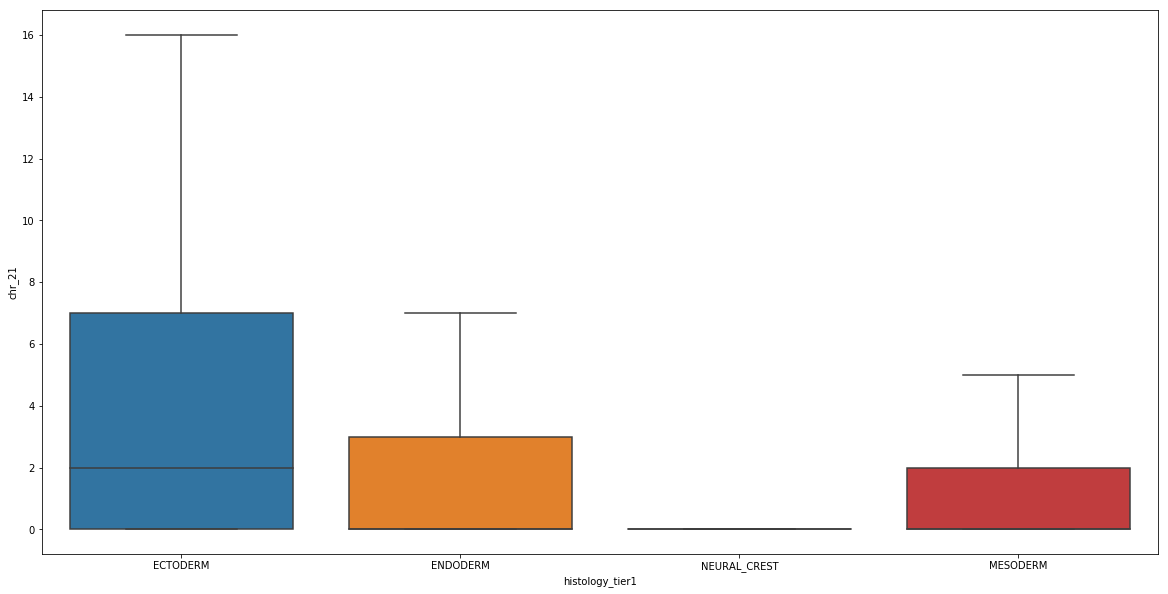

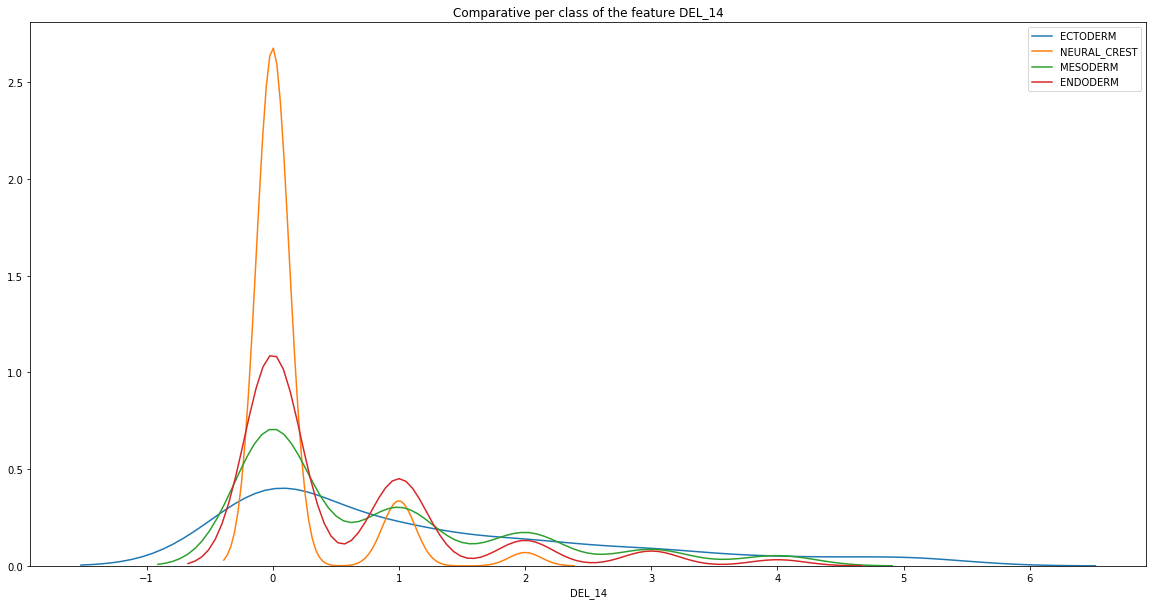

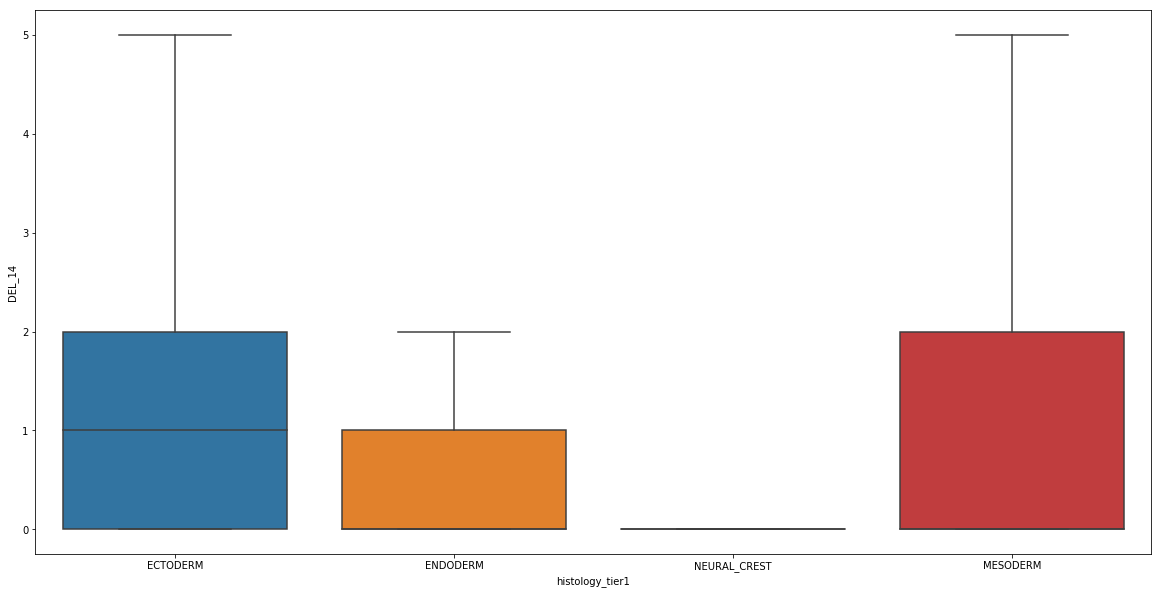

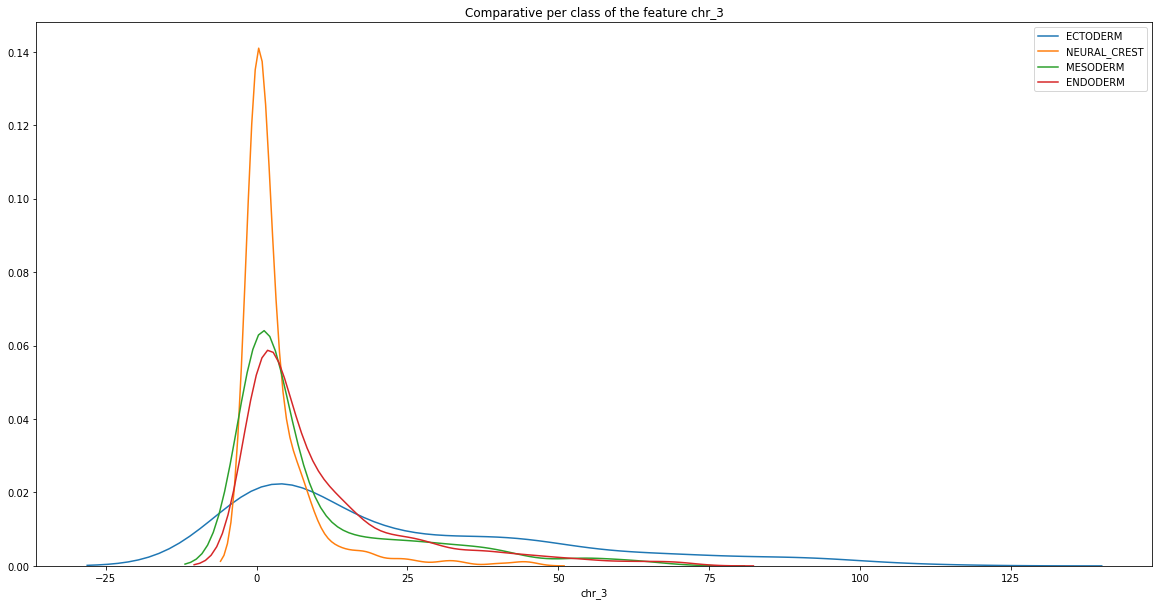

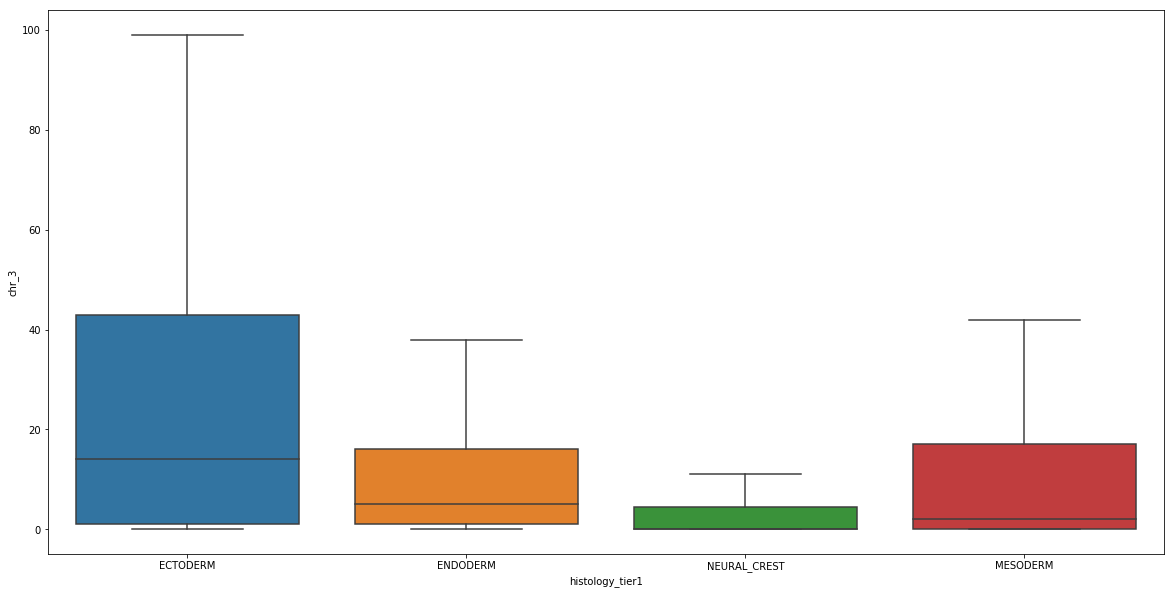

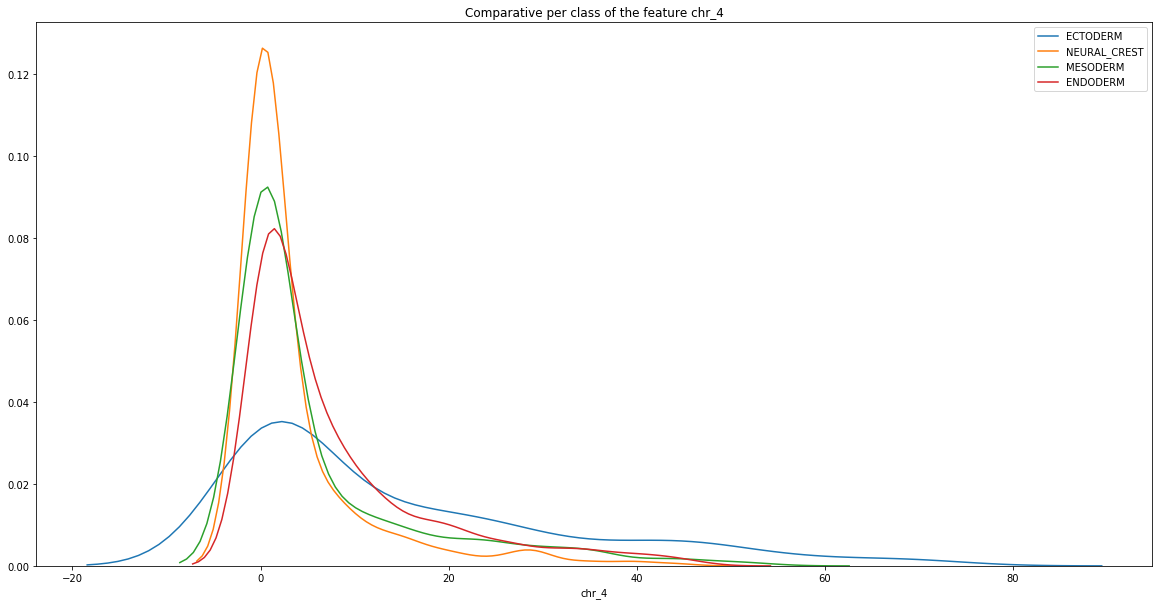

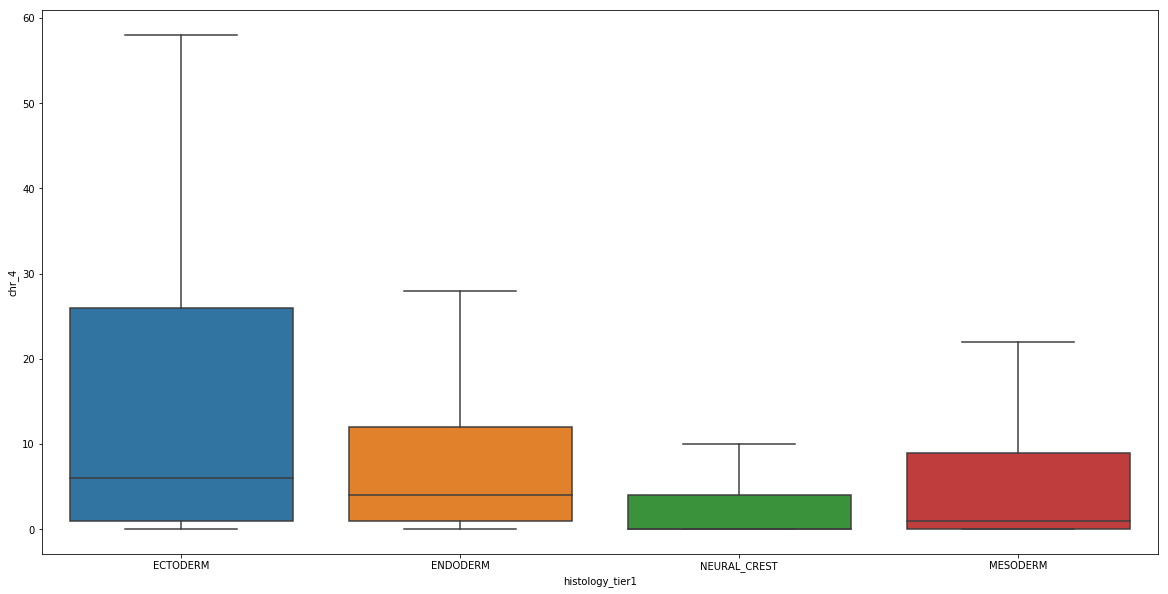

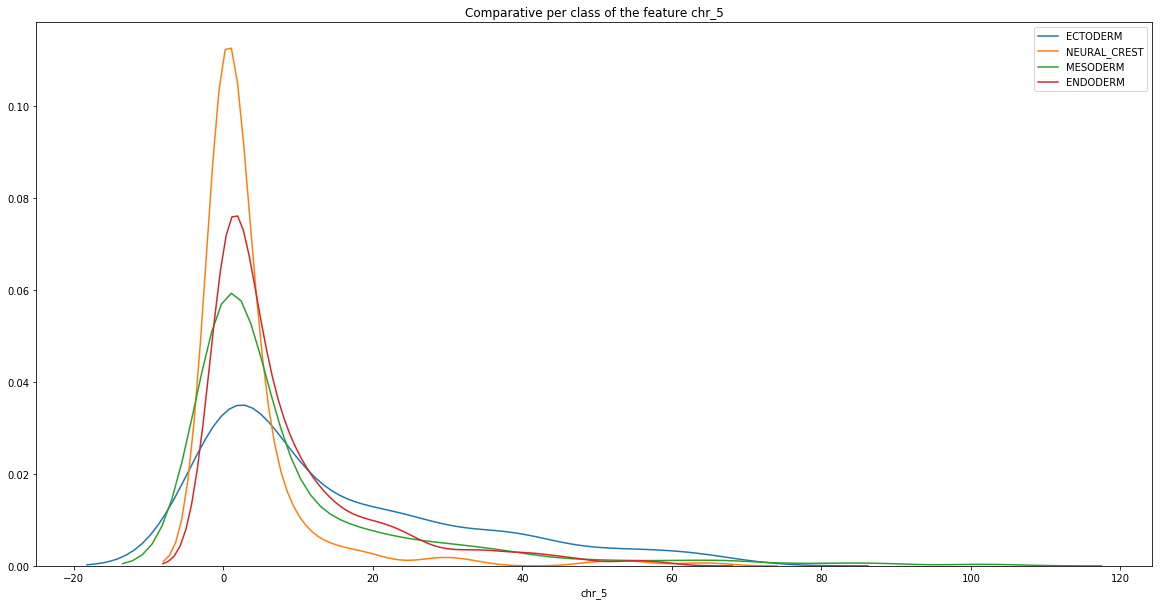

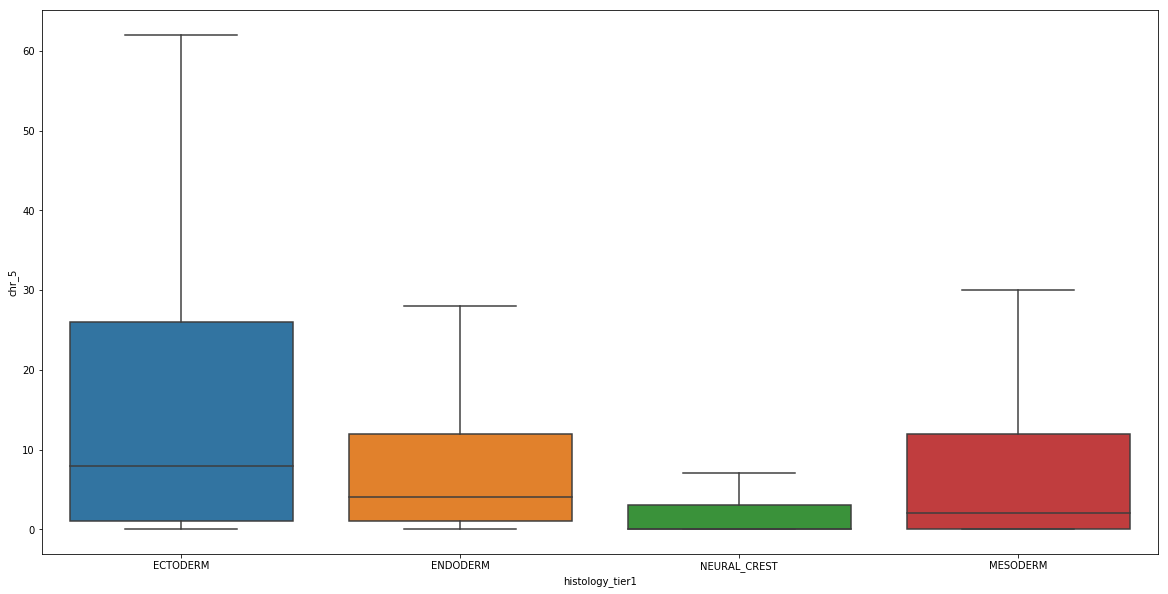

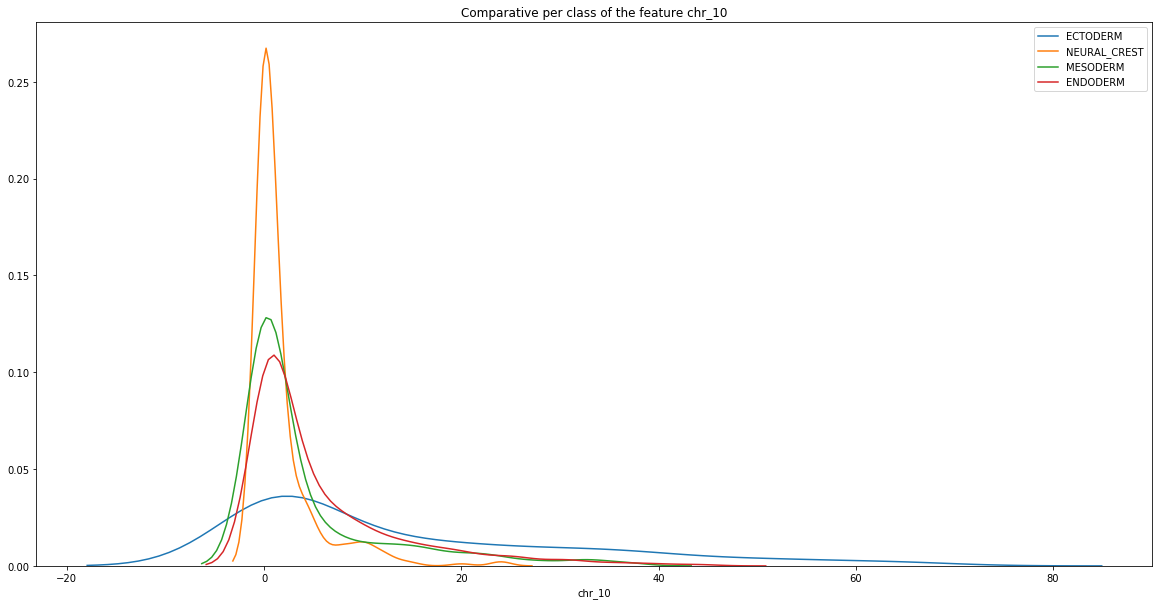

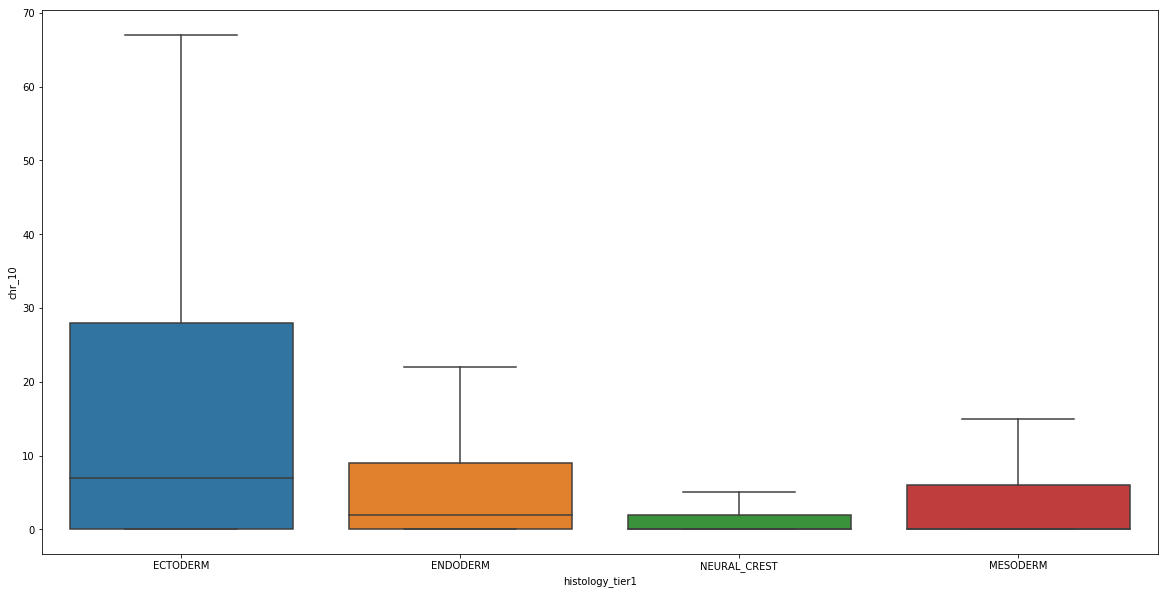

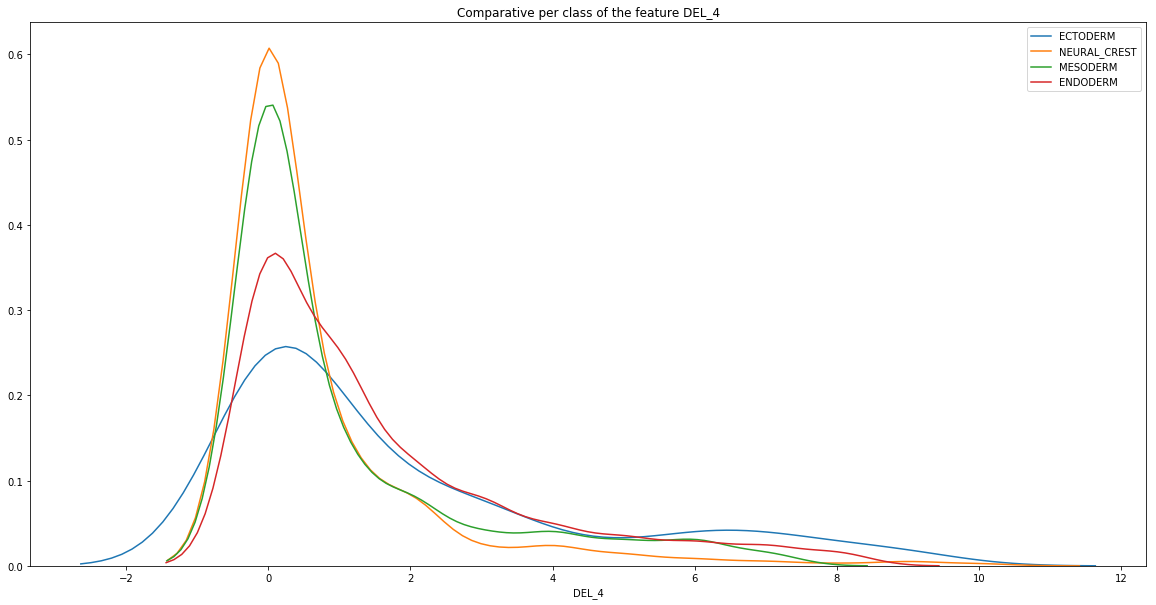

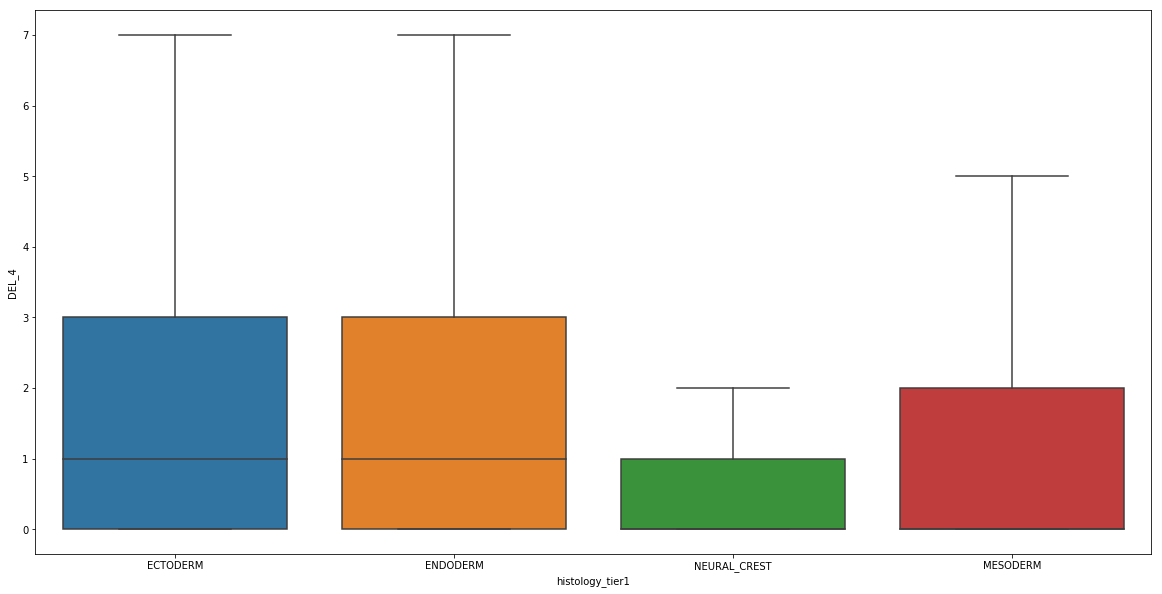

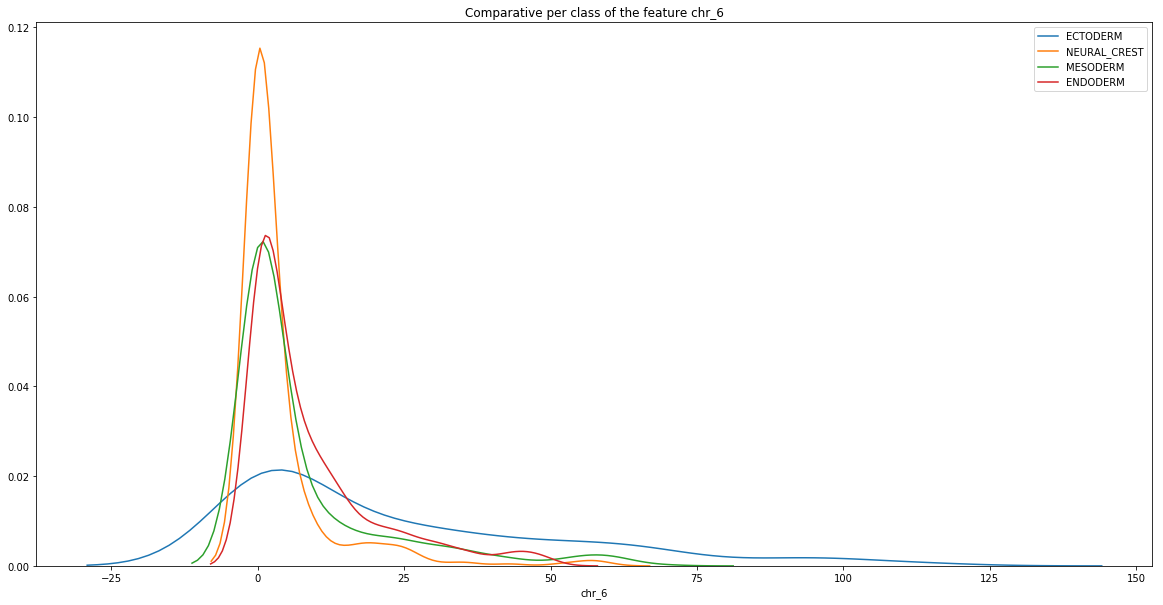

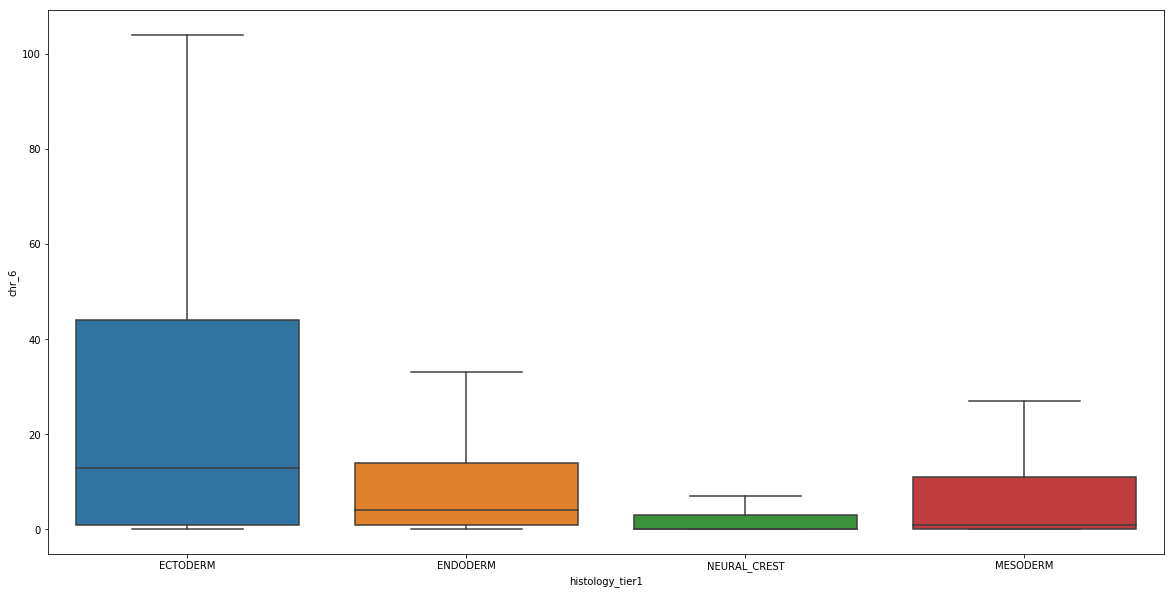

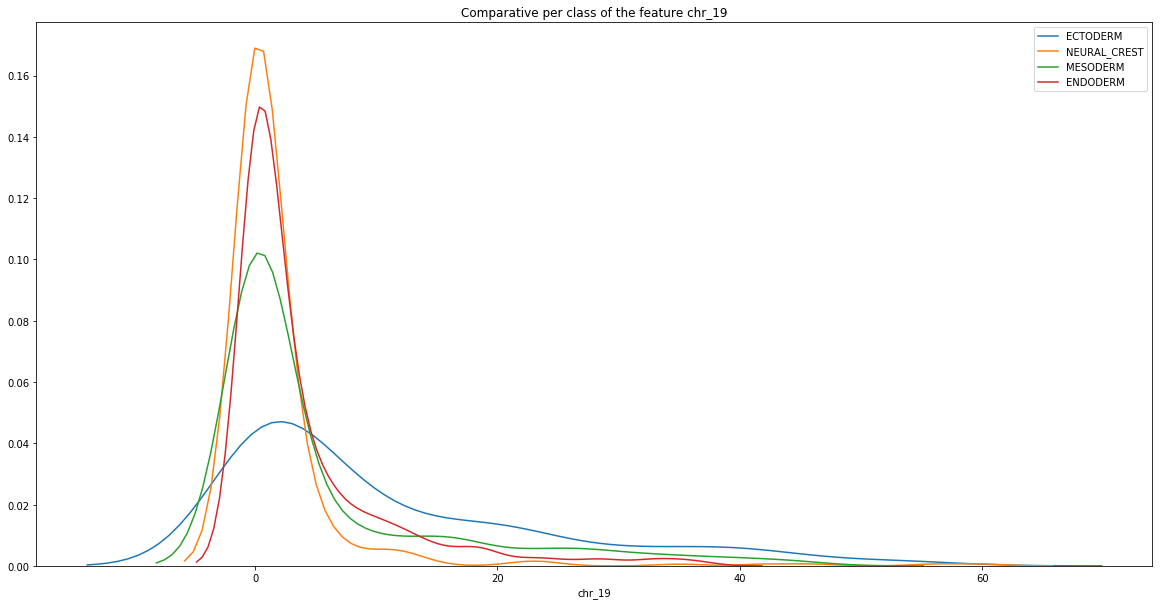

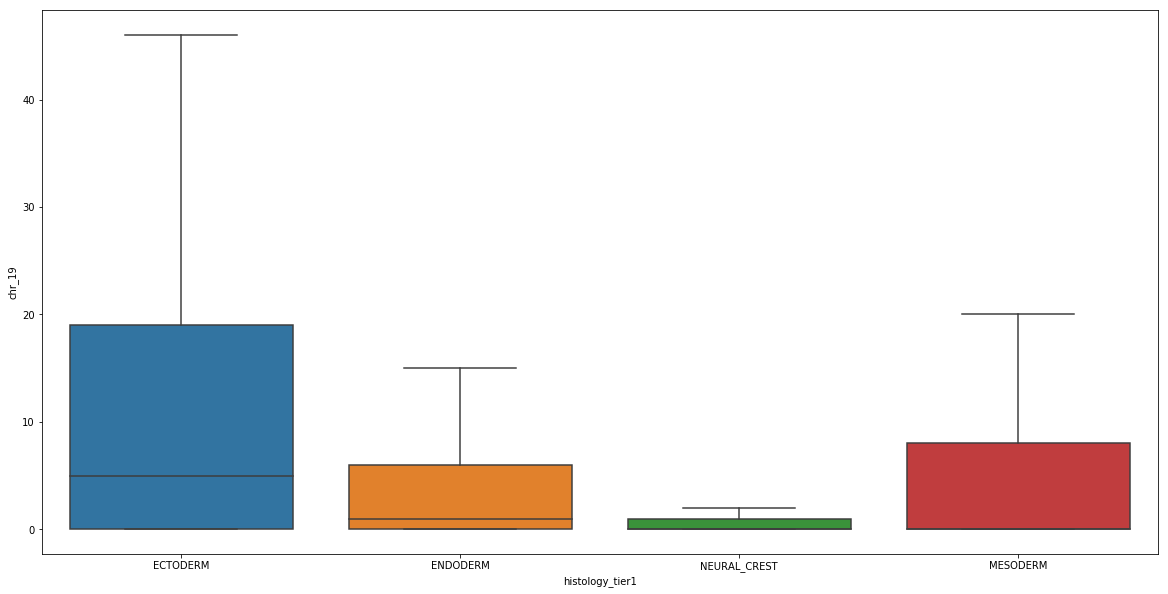

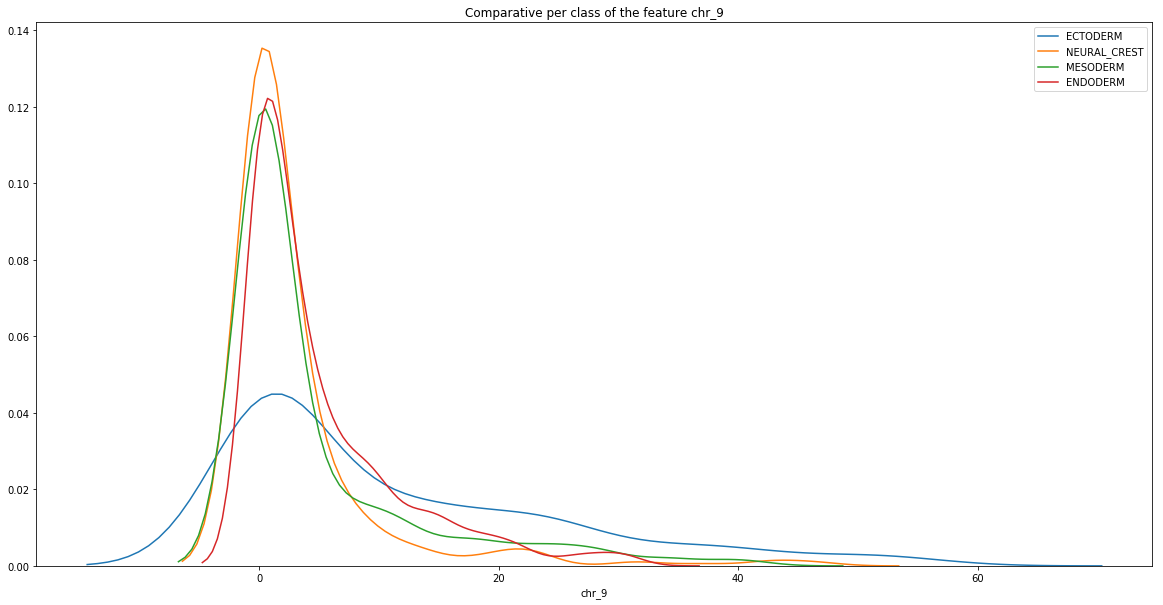

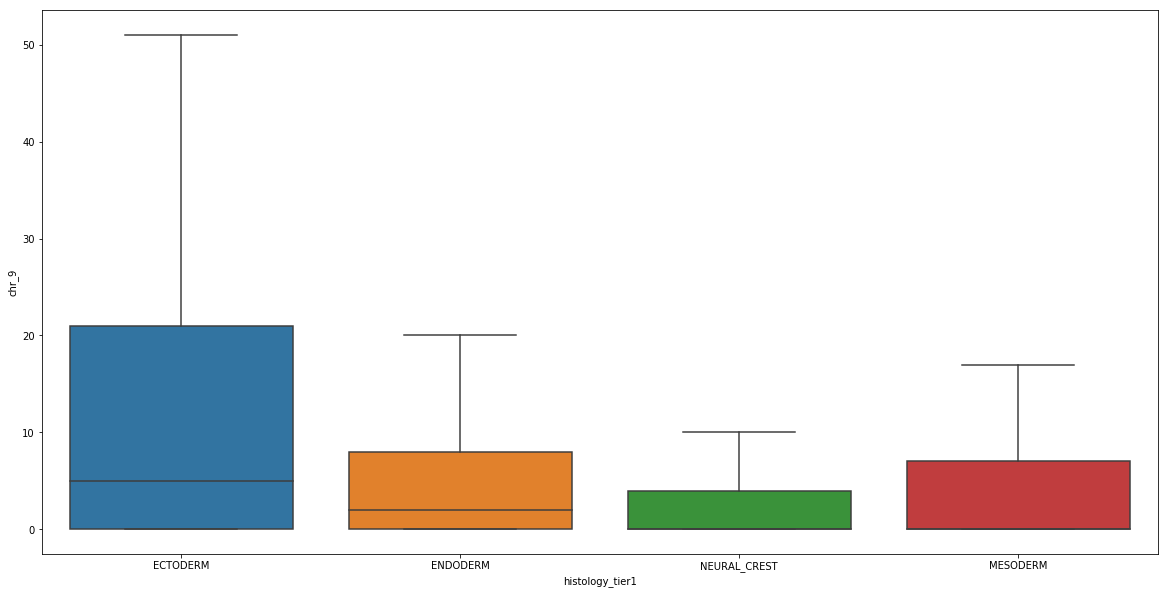

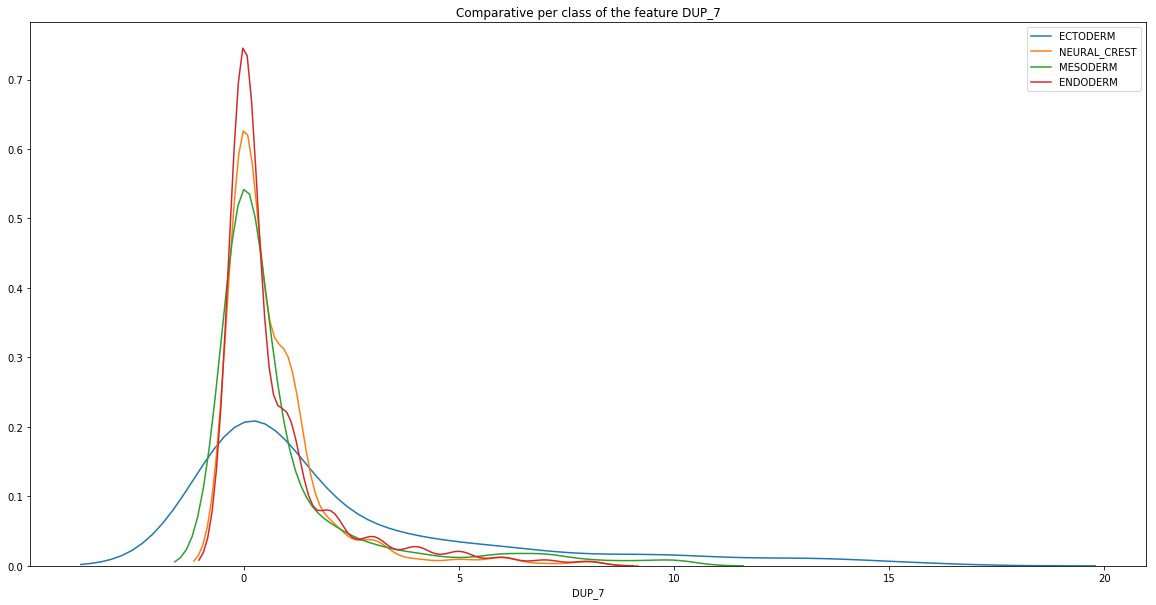

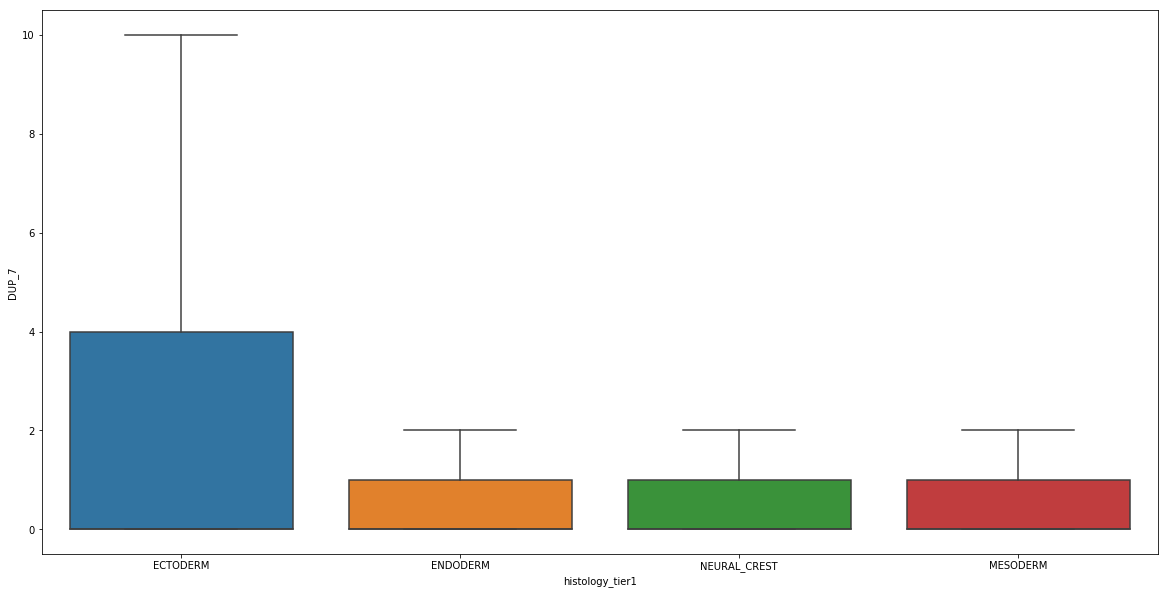

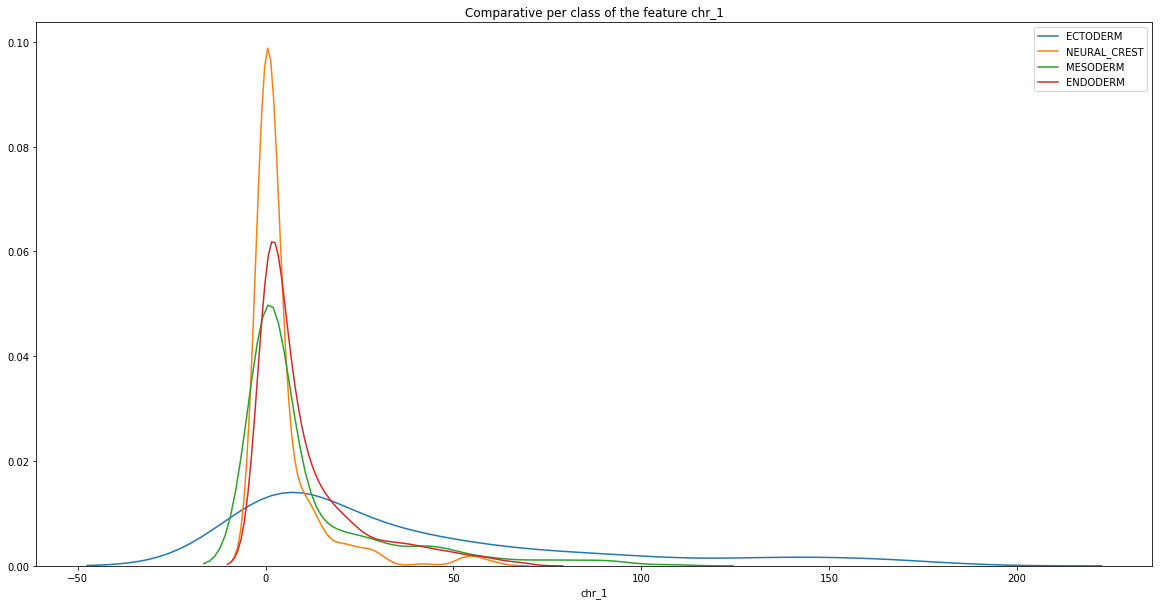

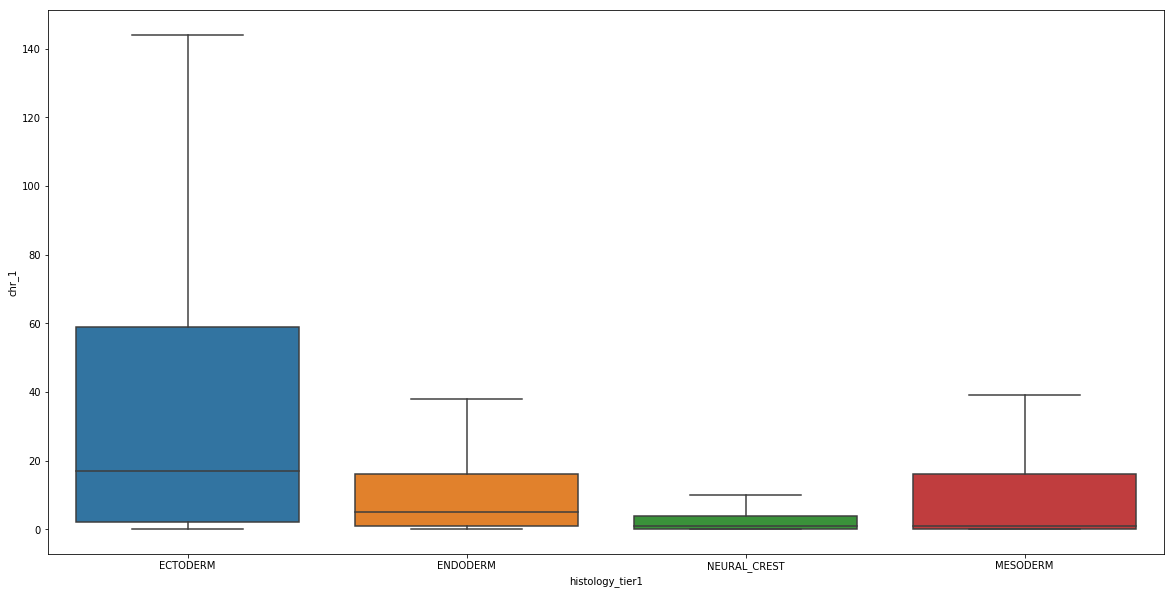

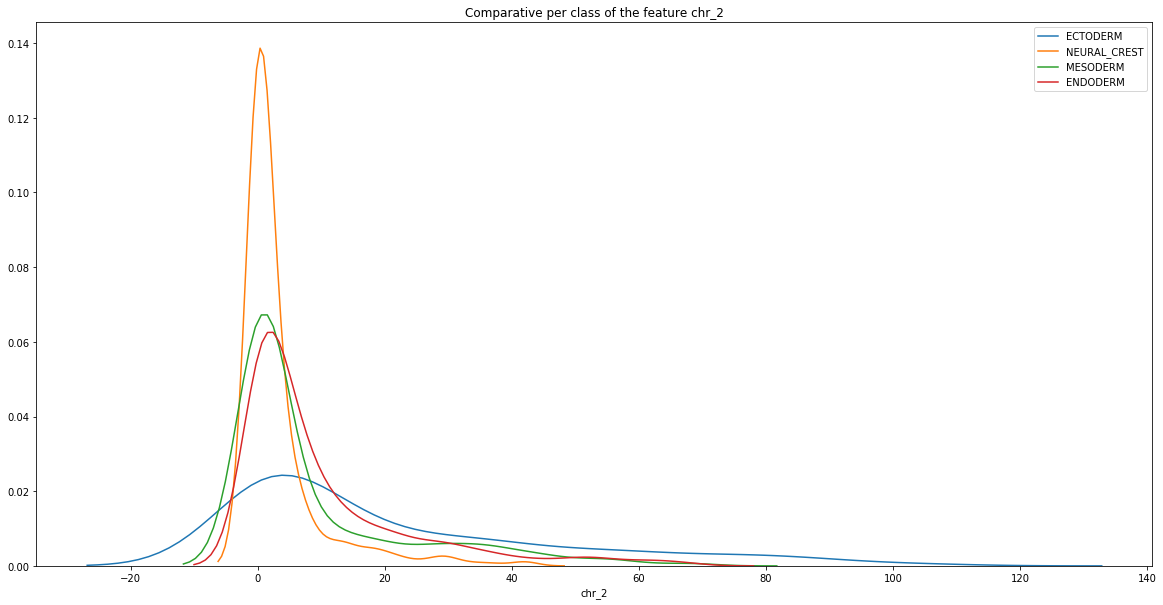

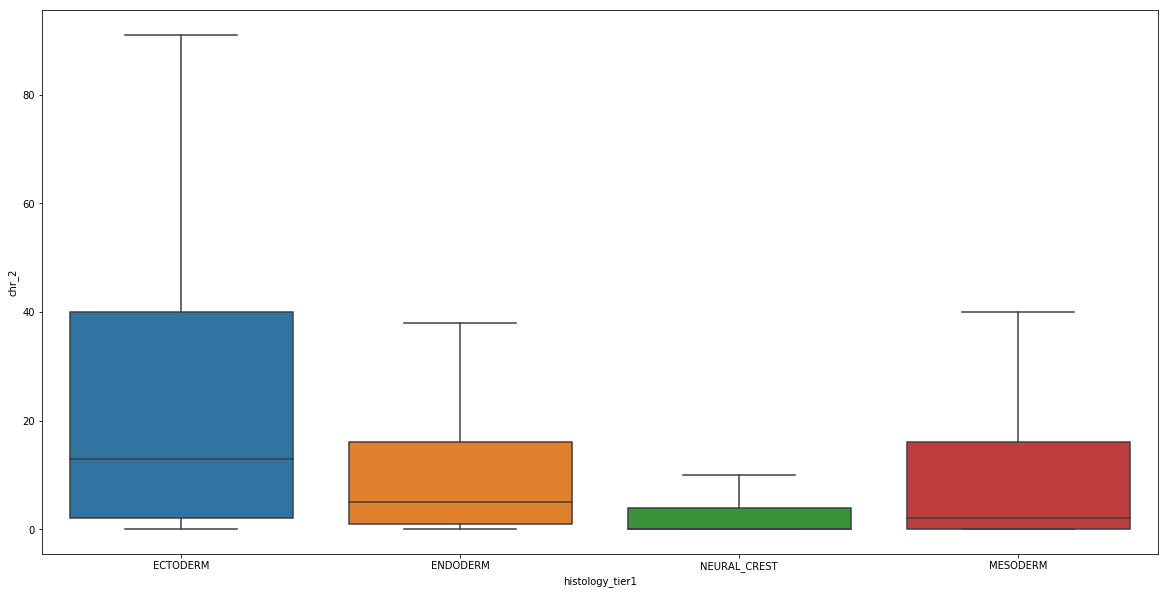

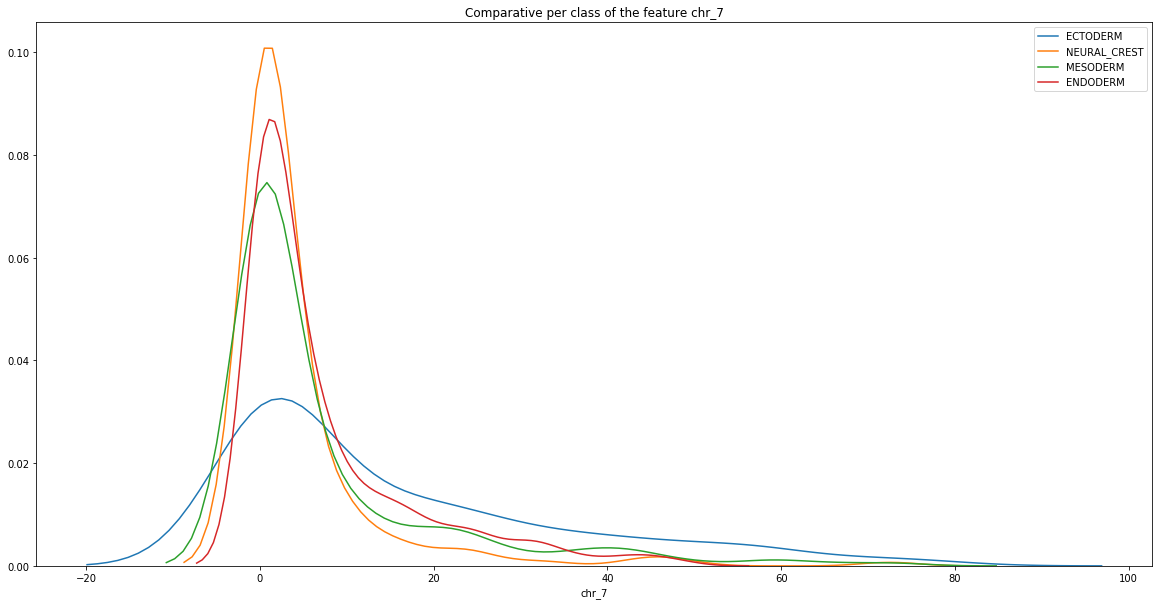

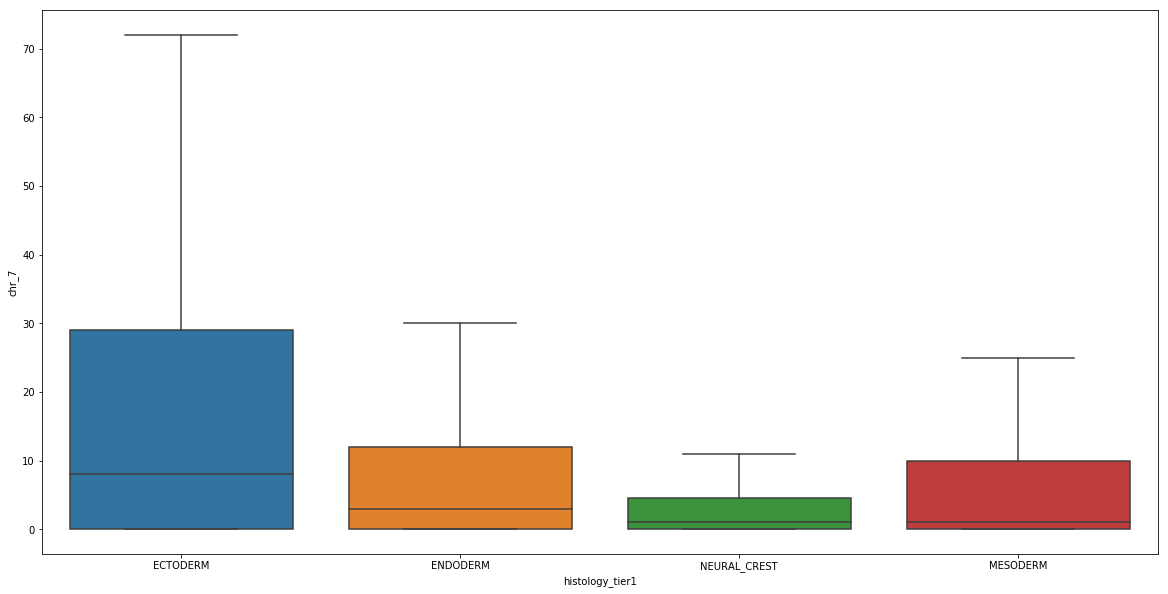

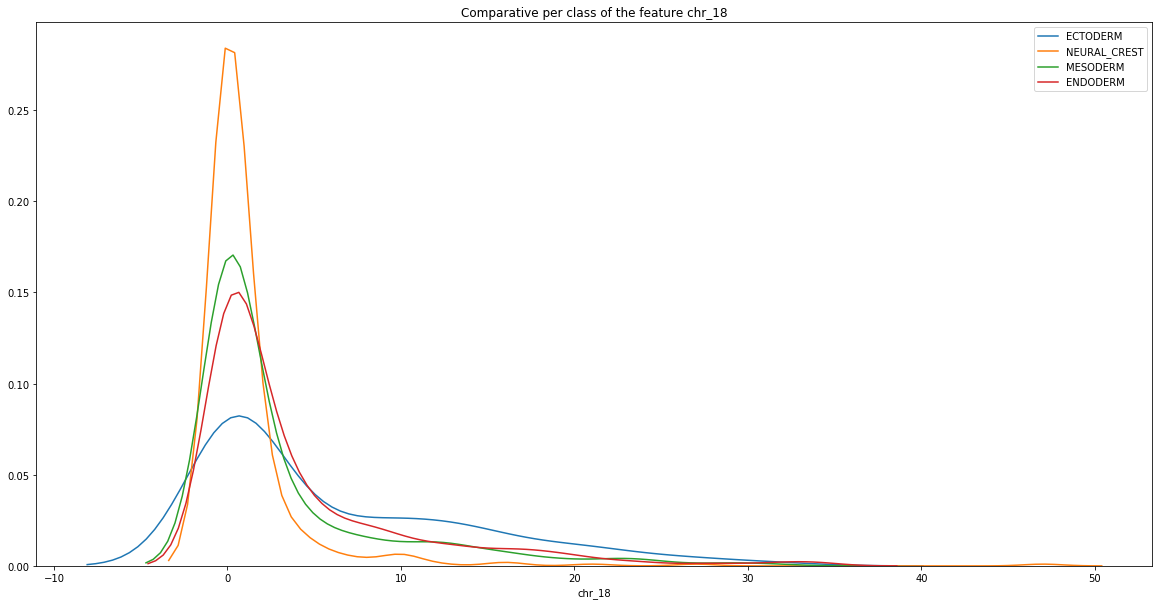

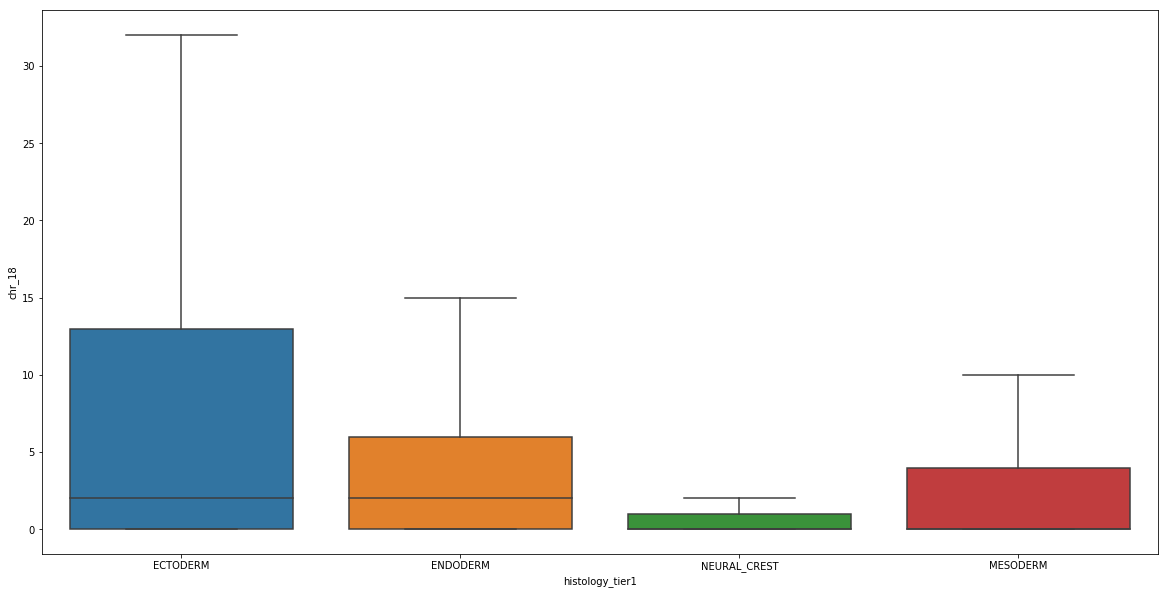

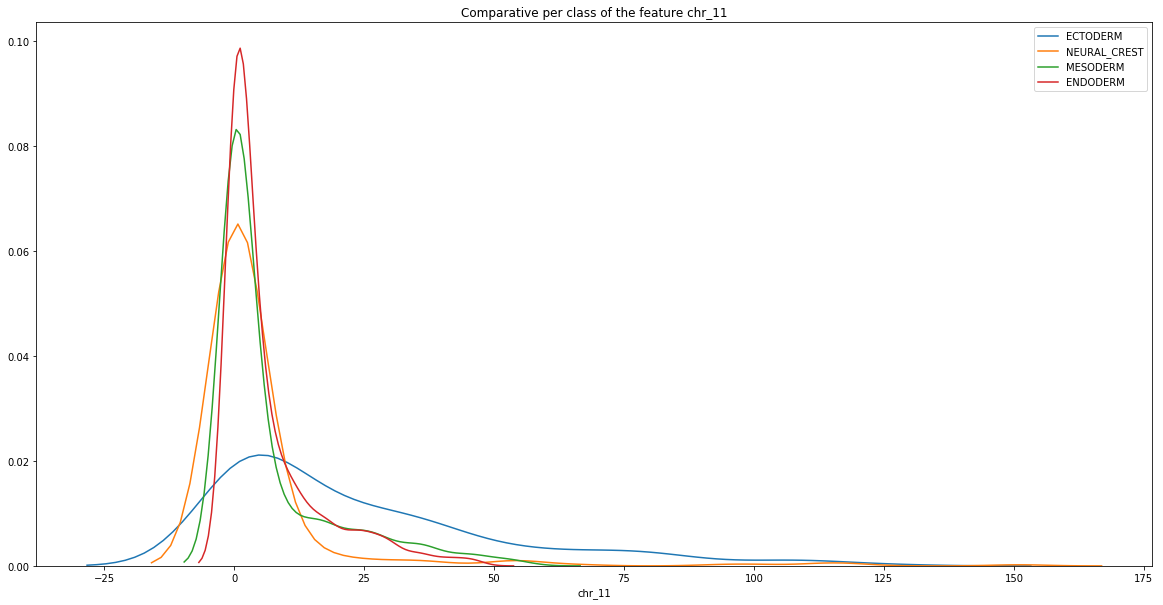

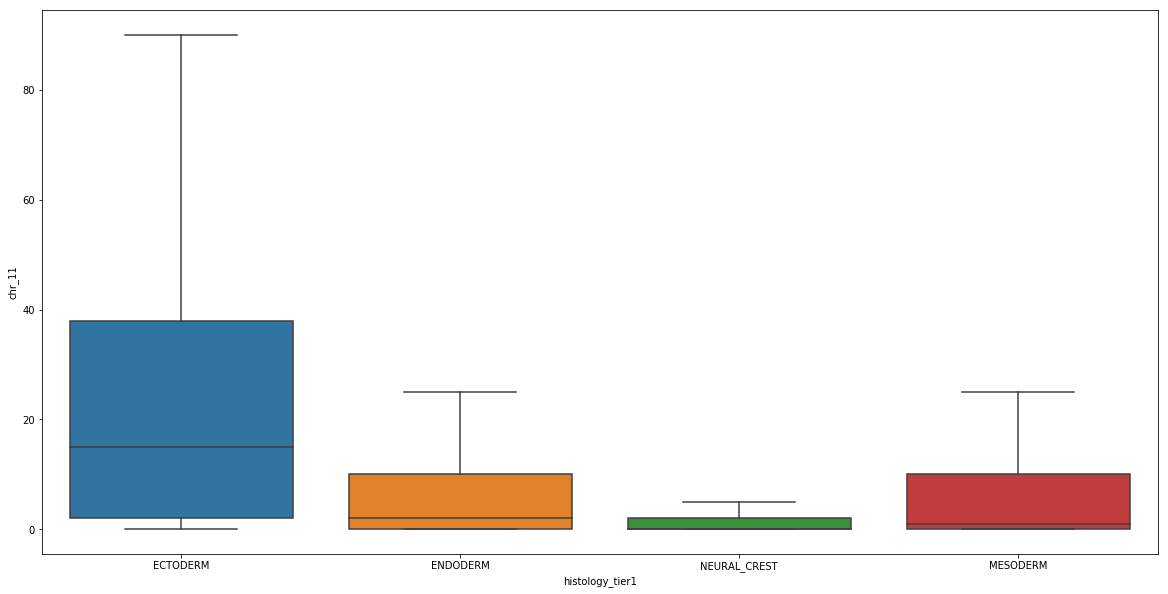

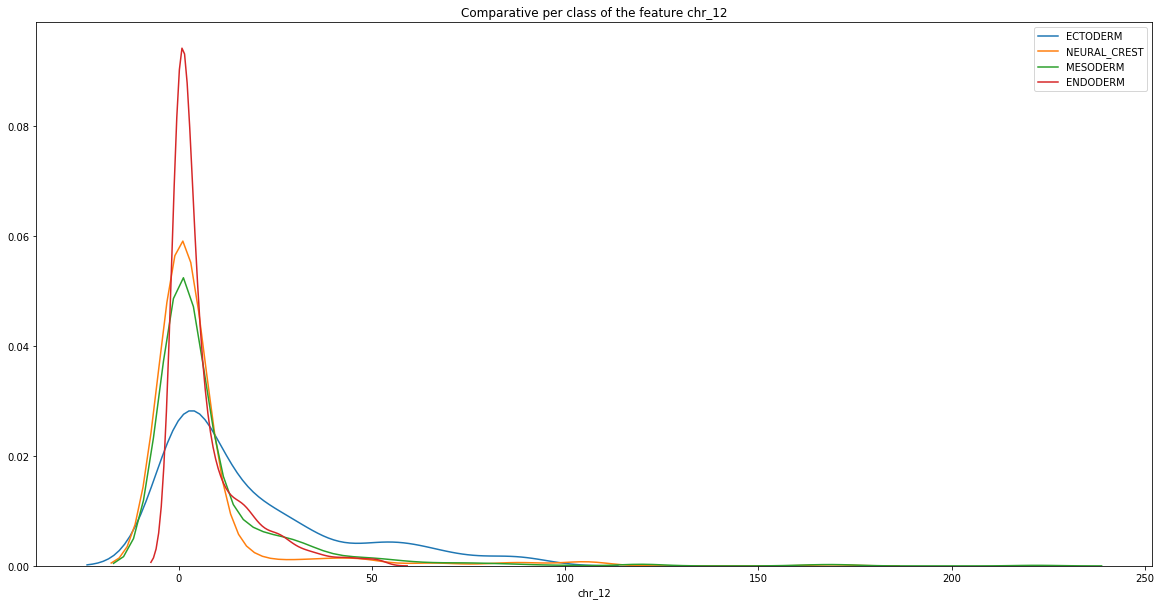

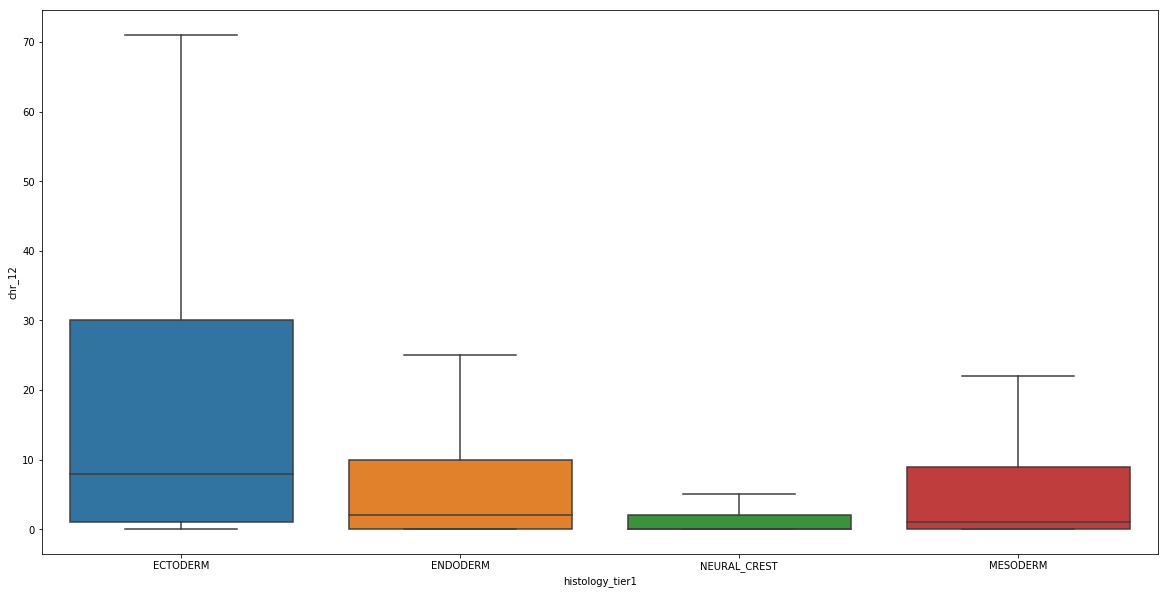

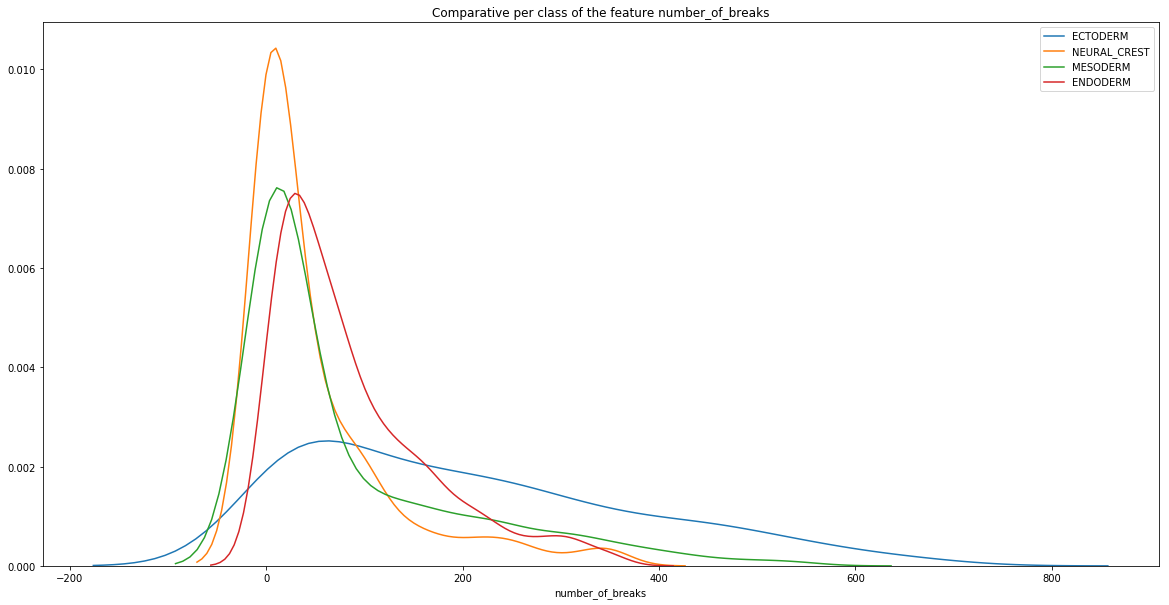

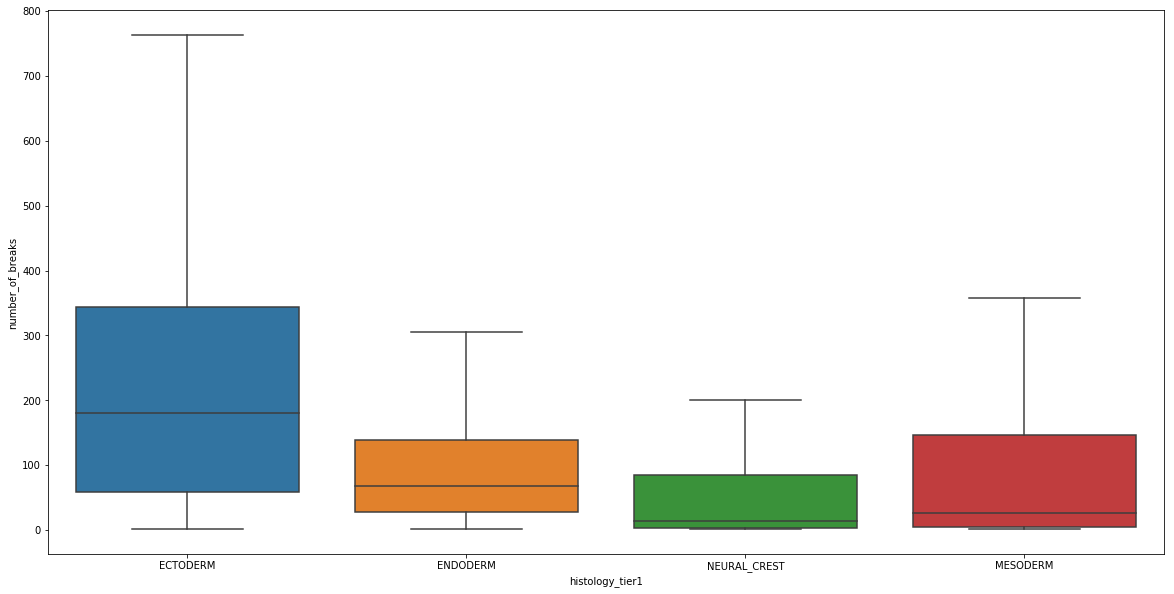

In [160]:
for feature in features:
    feature_characterization(feature)